In [ ]:
#Me traigo mis librerías de confianza
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Renombramos para mayor simplicidad
Hog1 = pd.read_csv('./Datos/Hogwards - 20241T.csv')
Hog2 = pd.read_csv('./Datos/Hogwards - 20242T.csv')
Hog3 = pd.read_csv('./Datos/Hogwards - 20243T.csv')

In [ ]:
#Llammo a sql
%load_ext sql
%sql sqlite://

In [ ]:
#Convierto los dataframes en tablas para sql
%sql drop table if exists Hog1
%sql --persist Hog1

%sql drop table if exists Hog2
%sql --persist Hog2

%sql drop table if exists Hog3
%sql --persist Hog3



 * sqlite://
Done.
 * sqlite://
 * sqlite://
Done.
 * sqlite://
 * sqlite://
Done.
 * sqlite://


'Persisted hog3'

# **Primer Trimestre**

In [ ]:
#Vemos como se presentan los datos
Hog1.head(15)

,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers
0,DP001,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Production,1.4.0,46
1,DP002,CriaturaWatch,Sistema de Seguimiento de Hechizos,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,True,Production,2.6.9,100
2,DP003,EstelarMap,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.4.1,38
3,DP004,Transfigurator,Monitor de Pociones,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Development,2.9.6,99
4,DP005,CriaturaWatch,Vigilante de Criaturas Magicas,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,True,Production,2.3.7,51
5,DP006,EstelarMap,Guardian de la Historia,"Data Product relacionado con herbologia, utili...",Herbologia,Pomona Sprout,False,Planned,2.0.8,72
6,DP007,TrackHechizo,Mapa Estelar,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Deprecated,2.9.2,100
7,DP008,ProfeciaMonitor,Mapa Estelar,Data Product relacionado con historia de la ma...,Historia de la Magia,Cuthbert Binns,True,Development,0.0.1,33
8,DP009,HerboApp,Mapa Estelar,Data Product relacionado con cuidado de criatu...,Cuidado de Criaturas Magicas,Rubeus Hagrid,False,Production,2.3.7,74
9,DP010,Transfigurator,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.6.2,43


In [ ]:
#Veamos el total de filas será igual al nº de data products
Hog1.shape

(50, 10)

## ESTADO ACTUAL DE LOS DATAPRODUCTS

In [ ]:
#Contamos cuantos hechizos hay por Dominio
pd.value_counts(Hog1['Domain'])

<ipython-input-50-d9f81fc8a9d4>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(Hog1['Domain'])


,count
Domain,
Adivinacion,8
Pociones,8
Herbologia,7
Transformaciones,6
Historia de la Magia,6
Encantamientos,5
Astronomia,4
Cuidado de Criaturas Magicas,3
Defensa Contra las Artes Oscuras,3


Vemos más detalladamente los datos de mis hechizos en cada dominio

In [ ]:

Adiv=Hog1.query('Domain == "Adivinacion"')[['ID','Domain','Status']]
Adiv.head(120)


,ID,Domain,Status
0,DP001,Adivinacion,Production
16,DP017,Adivinacion,Production
22,DP023,Adivinacion,Development
31,DP032,Adivinacion,Deprecated
32,DP033,Adivinacion,Production
35,DP036,Adivinacion,Production
36,DP037,Adivinacion,Development
45,DP046,Adivinacion,Development


In [ ]:
len(Adiv)

8

In [ ]:
Poci=Hog1.query('Domain == "Pociones"')[['ID','Domain','Status']]
Poci.head(12)

,ID,Domain,Status
1,DP002,Pociones,Production
2,DP003,Pociones,Deprecated
9,DP010,Pociones,Deprecated
12,DP013,Pociones,Development
14,DP015,Pociones,Planned
20,DP021,Pociones,Production
24,DP025,Pociones,Development
33,DP034,Pociones,Production


In [ ]:
Herb=Hog1.query('Domain == "Herbologia"')[['ID','Domain','Status']]
Herb.head(12)

,ID,Domain,Status
5,DP006,Herbologia,Planned
11,DP012,Herbologia,Planned
13,DP014,Herbologia,Deprecated
17,DP018,Herbologia,Deprecated
23,DP024,Herbologia,Planned
27,DP028,Herbologia,Planned
42,DP043,Herbologia,Deprecated


In [ ]:
Transf=Hog1.query('Domain == "Transformaciones"')[['ID','Domain','Status']]
Transf.head(12)

,ID,Domain,Status
3,DP004,Transformaciones,Development
4,DP005,Transformaciones,Production
6,DP007,Transformaciones,Deprecated
37,DP038,Transformaciones,Development
40,DP041,Transformaciones,Planned
46,DP047,Transformaciones,Deprecated


In [ ]:
Hist=Hog1.query('Domain == "Historia de la Magia"')[['ID','Domain','Status']]
Hist.head(12)

,ID,Domain,Status
7,DP008,Historia de la Magia,Development
15,DP016,Historia de la Magia,Production
26,DP027,Historia de la Magia,Deprecated
29,DP030,Historia de la Magia,Development
43,DP044,Historia de la Magia,Development
44,DP045,Historia de la Magia,Deprecated


In [ ]:
Encant=Hog1.query('Domain == "Encantamientos"')[['ID','Domain','Status']]
Encant.head(12)

,ID,Domain,Status
19,DP020,Encantamientos,Development
30,DP031,Encantamientos,Deprecated
34,DP035,Encantamientos,Production
38,DP039,Encantamientos,Production
48,DP049,Encantamientos,Deprecated


In [ ]:
Astronom=Hog1.query('Domain == "Astronomia"')[['ID','Domain','Status']]
Astronom.head(12)

,ID,Domain,Status
25,DP026,Astronomia,Production
39,DP040,Astronomia,Planned
41,DP042,Astronomia,Planned
47,DP048,Astronomia,Planned


In [ ]:
Cuidado=Hog1.query('Domain == "Cuidado de Criaturas Magicas"')[['ID','Domain','Status']]
Cuidado.head(12)

,ID,Domain,Status
8,DP009,Cuidado de Criaturas Magicas,Production
21,DP022,Cuidado de Criaturas Magicas,Production
28,DP029,Cuidado de Criaturas Magicas,Planned


In [ ]:
Defensa=Hog1.query('Domain == "Defensa Contra las Artes Oscuras"')[['ID','Domain','Status']]
Defensa.head(12)

,ID,Domain,Status
10,DP011,Defensa Contra las Artes Oscuras,Production
18,DP019,Defensa Contra las Artes Oscuras,Development
49,DP050,Defensa Contra las Artes Oscuras,Planned


## ANÁLISIS DE LOS DATA PRODUCTS **PLANNED OR PRODUCTION**

In [ ]:
  #Filtro todos los hechizos que estén en Planned or production

Defensa=Hog1.query('Domain == "Defensa Contra las Artes Oscuras" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Cuidado=Hog1.query('Domain == "Cuidado de Criaturas Magicas" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Astronom=Hog1.query('Domain == "Astronomia" and Status != "Development" and Status !="Deprecated"')[['ID','Domain','Status']]
Encant=Hog1.query('Domain == "Encantamientos" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Hist=Hog1.query('Domain == "Historia de la Magia" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Transf=Hog1.query('Domain == "Transformaciones" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Herb=Hog1.query('Domain == "Herbologia" and Status != "Development" and Status !="Deprecated"')[['ID','Domain','Status']]
Poci=Hog1.query('Domain == "Pociones" and Status != "Development" and Status !="Deprecated"')[['ID','Domain','Status']]
Adiv=Hog1.query('Domain == "Adivinacion" and Status != "Development" and Status !="Deprecated"')[['ID','Domain','Status']]







In [ ]:
#Aplico los criterios de compilance con un bucle y lo añado a mi df a través de una columna
def Categorized(IsCompliance, Status):
    if Status == "Planned"  and IsCompliance == True:
        return 'Compliant'  # Return 'Compliant' if conditions are met
    elif Status == "Production"  and IsCompliance == True:
        return 'Compliant'  # Return 'Compliant' if conditions are met
    elif Status == "Production" and IsCompliance == False:
        return 'Non-Compliant'  # Return 'Non-Compliant' otherwise
    elif Status == "Planned" and IsCompliance == False:
        return 'Non-Compliant'  # Return 'Non-Compliant' otherwise
    else:
        return 'Dont Care'  # Return 'Unknown' if no conditions are met

Hog1['Analysis'] = Hog1.apply(lambda row: Categorized(row['IsCompliance'], row['Status']), axis=1)


In [ ]:
#Cuantos Data products son compilance
DpCompilance=Hog1.query('Analysis == "Compliant"')
DpCompilance['Analysis'].count()

14

In [ ]:
#Separo el número de usuarios por área

AdivUsers=Hog1.query('Analysis == "Compliant" and Domain == "Adivinacion"')
print("En adivinación hay" , AdivUsers['NumberUsers'].sum(), "magos que usan Esos DP")

PociUsers=Hog1.query('Analysis == "Compliant" and Domain == "Pociones"')
print("En Pociones hay" , PociUsers['NumberUsers'].sum(), "magos que usan Esos DP")

HerbUsers=Hog1.query('Analysis == "Compliant" and Domain == "Herbologia"')
print("En Herbología hay" , HerbUsers['NumberUsers'].sum(), "magos que usan Esos DP")

TransfUsers=Hog1.query('Analysis == "Compliant" and Domain == "Transformaciones"')
print("En Transformaciones hay" , TransfUsers['NumberUsers'].sum(), "magos que usan Esos DP")

HistUsers=Hog1.query('Analysis == "Compliant" and Domain == "Historia de la Magia"')
print("En Historia de la Magia hay" , HistUsers['NumberUsers'].sum(), "magos que usan Esos DP")

EncantUsers=Hog1.query('Analysis == "Compliant" and Domain == "Encantamientos"')
print("En Encantamientos hay" , EncantUsers['NumberUsers'].sum(), "magos que usan Esos DP")

AstronomUsers=Hog1.query('Analysis == "Compliant" and Domain == "Astronomia"')
print("En Astronomía hay" , AstronomUsers['NumberUsers'].sum(), "magos que usan Esos DP")

CuidadoUsers=Hog1.query('Analysis == "Compliant" and Domain == "Cuidado de Criaturas Magicas"')
print("En Cuidado de Criaturas Magicas hay" , CuidadoUsers['NumberUsers'].sum(), "magos que usan Esos DP")


DefensaUsers=Hog1.query('Analysis == "Compliant" and Domain == "Defensa Contra las Artes Oscuras"')
print("En Defensa Contra las Artes Oscuras hay" , DefensaUsers['NumberUsers'].sum(), "magos que usan Esos DP")

En adivinación hay 146 magos que usan Esos DP
En Pociones hay 288 magos que usan Esos DP
En Herbología hay 0 magos que usan Esos DP
En Transformaciones hay 51 magos que usan Esos DP
En Historia de la Magia hay 0 magos que usan Esos DP
En Encantamientos hay 200 magos que usan Esos DP
En Astronomía hay 295 magos que usan Esos DP
En Cuidado de Criaturas Magicas hay 0 magos que usan Esos DP
En Defensa Contra las Artes Oscuras hay 177 magos que usan Esos DP


In [ ]:
#Calculo el número total de usuarios
TotalUsers = AdivUsers['NumberUsers'].sum() + PociUsers['NumberUsers'].sum() + HerbUsers['NumberUsers'].sum() + TransfUsers['NumberUsers'].sum() + HistUsers['NumberUsers'].sum() + EncantUsers['NumberUsers'].sum() + AstronomUsers['NumberUsers'].sum() + CuidadoUsers['NumberUsers'].sum() + DefensaUsers['NumberUsers'].sum()

In [ ]:
#Suma los valore unicos de la columna domain es decir el numero de domains que existen
UsersPerDomain = TotalUsers / Hog1['Domain'].nunique()
UsersPerDomain

128.55555555555554

In [ ]:
#Usuarios con hechizos que no cumplen las normas

AdivUsers=Hog1.query('Analysis == "Non-Compliant" and Domain == "Adivinacion"')
print("En adivinación hay" , AdivUsers['NumberUsers'].sum(), "magos que usan Esos DP")

PociUsers=Hog1.query('Analysis == "Non-Compliant" and Domain == "Pociones"')
print("En Pociones hay" , PociUsers['NumberUsers'].sum(), "magos que usan Esos DP")

HerbUsers=Hog1.query('Analysis == "Non-Compliant" and Domain == "Herbologia"')
print("En Herbología hay" , HerbUsers['NumberUsers'].sum(), "magos que usan Esos DP")

TransfUsers=Hog1.query('Analysis == "Non-Compliant" and Domain == "Transformaciones"')
print("En Transformaciones hay" , TransfUsers['NumberUsers'].sum(), "magos que usan Esos DP")

HistUsers=Hog1.query('Analysis == "Non-Compliant" and Domain == "Historia de la Magia"')
print("En Historia de la Magia hay" , HistUsers['NumberUsers'].sum(), "magos que usan Esos DP")

EncantUsers=Hog1.query('Analysis == "Non-Compliant" and Domain == "Encantamientos"')
print("En Encantamientos hay" , EncantUsers['NumberUsers'].sum(), "magos que usan Esos DP")

AstronomUsers=Hog1.query('Analysis == "Non-Compliant" and Domain == "Astronomia"')
print("En Astronomía hay" , AstronomUsers['NumberUsers'].sum(), "magos que usan Esos DP")

CuidadoUsers=Hog1.query('Analysis == "Non-Compliant" and Domain == "Cuidado de Criaturas Magicas"')
print("En Cuidado de Criaturas Magicas hay" , CuidadoUsers['NumberUsers'].sum(), "magos que usan Esos DP")


DefensaUsers=Hog1.query('Analysis == "Non-Compliant" and Domain == "Defensa Contra las Artes Oscuras"')
print("En Defensa Contra las Artes Oscuras hay" , DefensaUsers['NumberUsers'].sum(), "magos que usan Esos DP")

En adivinación hay 113 magos que usan Esos DP
En Pociones hay 0 magos que usan Esos DP
En Herbología hay 372 magos que usan Esos DP
En Transformaciones hay 27 magos que usan Esos DP
En Historia de la Magia hay 56 magos que usan Esos DP
En Encantamientos hay 0 magos que usan Esos DP
En Astronomía hay 68 magos que usan Esos DP
En Cuidado de Criaturas Magicas hay 183 magos que usan Esos DP
En Defensa Contra las Artes Oscuras hay 0 magos que usan Esos DP


## ANÁLISIS DE LOS DATA PRODUCTS **DEPRECATED**

In [ ]:
 #Hago un filtrado de los hechizos que ya no están en funcionamiento y el número de ususarios conectados a estos
 Defensa=Hog1.query('Domain == "Defensa Contra las Artes Oscuras" and Status == "Deprecated"  ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Defensa hay", Defensa['Status'].count(), "Deprecated DP's y ",Defensa['NumberUsers'].sum(),"que los siguen usando")
Cuidado=Hog1.query('Domain == "Cuidado de Criaturas Magicas" and Status == "Deprecated" ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Cuidado hay", Cuidado['Status'].count(), "Deprecated DP's y ",Cuidado['NumberUsers'].sum(),"que los siguen usando")
Astronom=Hog1.query('Domain == "Astronomia" and Status == "Deprecated" ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Astronomía hay", Astronom['Status'].count(), "Deprecated DP's y ",Astronom['NumberUsers'].sum(),"que los siguen usando")
Encant=Hog1.query('Domain == "Encantamientos" and Status == "Deprecated" ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Encantamientos hay", Encant['Status'].count(), "Deprecated DP's y ",Encant['NumberUsers'].sum(),"que los siguen usando")
Hist=Hog1.query('Domain == "Historia de la Magia" and Status == "Deprecated"  ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Historia hay", Hist['Status'].count(), "Deprecated DP's y ", Hist['NumberUsers'].sum(), "que los siguen usando")
Transf=Hog1.query('Domain == "Transformaciones" and Status == "Deprecated"')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Transformaciones hay", Transf['Status'].count(), "Deprecated DP's y " ,Transf['NumberUsers'].sum(),"que los siguen usando")
Herb=Hog1.query('Domain == "Herbologia" and Status == "Deprecated" ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Herbología hay", Herb['Status'].count(), "Deprecated DP's y ", Herb['NumberUsers'].sum(),"que los siguen usando")
Poci=Hog1.query('Domain == "Pociones" and Status == "Deprecated"')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Pociones hay", Poci['Status'].count(), "Deprecated DP's y " ,Poci['NumberUsers'].sum(),"que los siguen usando")
Adiv=Hog1.query('Domain == "Adivinacion" and Status == "Deprecated"')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Adivinación hay", Adiv['Status'].count(), "Deprecated DP's y ", Adiv['NumberUsers'].sum(),"que los siguen usando")


En el dominio Defensa hay 0 Deprecated DP's y  0 que los siguen usando
En el dominio Cuidado hay 0 Deprecated DP's y  0 que los siguen usando
En el dominio Astronomía hay 0 Deprecated DP's y  0 que los siguen usando
En el dominio Encantamientos hay 2 Deprecated DP's y  68 que los siguen usando
En el dominio Historia hay 2 Deprecated DP's y  97 que los siguen usando
En el dominio Transformaciones hay 2 Deprecated DP's y  200 que los siguen usando
En el dominio Herbología hay 3 Deprecated DP's y  170 que los siguen usando
En el dominio Pociones hay 2 Deprecated DP's y  81 que los siguen usando
En el dominio Adivinación hay 1 Deprecated DP's y  52 que los siguen usando


## ANÁLISIS DE LOS OWNERS 1º TRIMESTRE

In [ ]:
Hog1.head(15)

,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers
0,DP001,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Production,1.4.0,46
1,DP002,CriaturaWatch,Sistema de Seguimiento de Hechizos,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,True,Production,2.6.9,100
2,DP003,EstelarMap,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.4.1,38
3,DP004,Transfigurator,Monitor de Pociones,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Development,2.9.6,99
4,DP005,CriaturaWatch,Vigilante de Criaturas Magicas,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,True,Production,2.3.7,51
5,DP006,EstelarMap,Guardian de la Historia,"Data Product relacionado con herbologia, utili...",Herbologia,Pomona Sprout,False,Planned,2.0.8,72
6,DP007,TrackHechizo,Mapa Estelar,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Deprecated,2.9.2,100
7,DP008,ProfeciaMonitor,Mapa Estelar,Data Product relacionado con historia de la ma...,Historia de la Magia,Cuthbert Binns,True,Development,0.0.1,33
8,DP009,HerboApp,Mapa Estelar,Data Product relacionado con cuidado de criatu...,Cuidado de Criaturas Magicas,Rubeus Hagrid,False,Production,2.3.7,74
9,DP010,Transfigurator,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.6.2,43


In [ ]:
funcionarios = Hog1[['Owner', 'Domain', 'Status']] # Creo un sub df con la información de los funcionarios que necesito
funcionarios.head(10)

,Owner,Domain,Status
0,Sybill Trelawney,Adivinacion,Production
1,Severus Snape,Pociones,Production
2,Severus Snape,Pociones,Deprecated
3,Minerva McGonagall,Transformaciones,Development
4,Minerva McGonagall,Transformaciones,Production
5,Pomona Sprout,Herbologia,Planned
6,Minerva McGonagall,Transformaciones,Deprecated
7,Cuthbert Binns,Historia de la Magia,Development
8,Rubeus Hagrid,Cuidado de Criaturas Magicas,Production
9,Severus Snape,Pociones,Deprecated


In [ ]:
#Pregunto a mi nuevo df cuantos funcionarios hay
funcionarios['Owner'].nunique()

12

In [ ]:
#Data Products por estado asignados
products_by_owner_status = Hog1.groupby(['Owner', 'Status'])['ID'].count().reset_index()
products_by_owner_status.rename(columns={'ID': 'NumProducts'}, inplace=True)

print(products_by_owner_status)

                       Owner       Status  NumProducts
0              Alastor Moody   Production            1
1            Aurora Sinistra      Planned            3
2            Aurora Sinistra   Production            1
3             Cuthbert Binns   Deprecated            2
4             Cuthbert Binns  Development            3
5             Cuthbert Binns   Production            1
6            Filius Flitwick   Deprecated            2
7            Filius Flitwick  Development            1
8            Filius Flitwick   Production            2
9                    Firenze  Development            1
10                   Firenze   Production            2
11           Horace Slughorn  Development            1
12           Horace Slughorn      Planned            1
13           Horace Slughorn   Production            1
14        Minerva McGonagall   Deprecated            2
15        Minerva McGonagall  Development            2
16        Minerva McGonagall      Planned            1
17        

In [ ]:
products_by_owner_status = Hog1.groupby(['Owner', 'Status','Domain','NumberUsers'])['ID'].count().reset_index()
print(products_by_owner_status)

                       Owner       Status                            Domain  \
0              Alastor Moody   Production  Defensa Contra las Artes Oscuras   
1            Aurora Sinistra      Planned                        Astronomia   
2            Aurora Sinistra      Planned                        Astronomia   
3            Aurora Sinistra   Production                        Astronomia   
4             Cuthbert Binns   Deprecated              Historia de la Magia   
5             Cuthbert Binns   Deprecated              Historia de la Magia   
6             Cuthbert Binns  Development              Historia de la Magia   
7             Cuthbert Binns  Development              Historia de la Magia   
8             Cuthbert Binns  Development              Historia de la Magia   
9             Cuthbert Binns   Production              Historia de la Magia   
10           Filius Flitwick   Deprecated                    Encantamientos   
11           Filius Flitwick   Deprecated           

In [ ]:
#Número total de hechizos por Owner
TotalIDs=products_by_owner_status.groupby(['Owner'])['ID'].sum()
print(TotalIDs)

Owner
Alastor Moody               1
Aurora Sinistra             4
Cuthbert Binns              6
Filius Flitwick             5
Firenze                     3
Horace Slughorn             3
Minerva McGonagall          6
Pomona Sprout               7
Rubeus Hagrid               2
Severus Snape               7
Sybill Trelawney            5
Wilhelmina Grubbly-Plank    1
Name: ID, dtype: int64


In [ ]:
UsuariosMax=products_by_owner_status.query('Status == "Planned" or Status == "Production"')[['ID','Owner','Domain','Status','NumberUsers']]
UsuariosMax.head(10)

,ID,Owner,Domain,Status,NumberUsers
0,1,Alastor Moody,Defensa Contra las Artes Oscuras,Production,96
1,1,Aurora Sinistra,Astronomia,Planned,68
2,2,Aurora Sinistra,Astronomia,Planned,100
3,1,Aurora Sinistra,Astronomia,Production,95
9,1,Cuthbert Binns,Historia de la Magia,Production,56
13,2,Filius Flitwick,Encantamientos,Production,100
15,1,Firenze,Adivinacion,Production,50
16,1,Firenze,Adivinacion,Production,100
18,1,Horace Slughorn,Pociones,Planned,100
19,1,Horace Slughorn,Pociones,Production,32


In [ ]:
#Owners con mas usuarios usando los hechizos en Planned or Production
UsuariosMax.groupby(['Domain','Owner'])['NumberUsers'].sum()

Domain                            Owner                   
Adivinacion                       Firenze                     150
                                  Sybill Trelawney            109
Astronomia                        Aurora Sinistra             263
Cuidado de Criaturas Magicas      Rubeus Hagrid               168
                                  Wilhelmina Grubbly-Plank     15
Defensa Contra las Artes Oscuras  Alastor Moody                96
                                  Severus Snape                81
Encantamientos                    Filius Flitwick             100
Herbologia                        Pomona Sprout               172
Historia de la Magia              Cuthbert Binns               56
Pociones                          Horace Slughorn             132
                                  Severus Snape               156
Transformaciones                  Minerva McGonagall           78
Name: NumberUsers, dtype: int64

In [ ]:
#Creo less productive identificando los deprecated
LessProductive=products_by_owner_status.query('Status == "Deprecated"')[['ID','Owner','Domain','Status','NumberUsers']]
LessProductive.head(10)

,ID,Owner,Domain,Status,NumberUsers
4,1,Cuthbert Binns,Historia de la Magia,Deprecated,39
5,1,Cuthbert Binns,Historia de la Magia,Deprecated,58
10,1,Filius Flitwick,Encantamientos,Deprecated,17
11,1,Filius Flitwick,Encantamientos,Deprecated,51
20,2,Minerva McGonagall,Transformaciones,Deprecated,100
25,1,Pomona Sprout,Herbologia,Deprecated,20
26,1,Pomona Sprout,Herbologia,Deprecated,50
27,1,Pomona Sprout,Herbologia,Deprecated,100
32,1,Severus Snape,Pociones,Deprecated,38
33,1,Severus Snape,Pociones,Deprecated,43


In [ ]:
LessProductive=LessProductive.groupby(['Domain','Owner'])['ID'].sum()
LessProductive.head(10)

,,ID
Domain,Owner,
Adivinacion,Sybill Trelawney,1
Encantamientos,Filius Flitwick,2
Herbologia,Pomona Sprout,3
Historia de la Magia,Cuthbert Binns,2
Pociones,Severus Snape,2
Transformaciones,Minerva McGonagall,2


In [ ]:
print("La productividad de Sybill Trelawney es de un", LessProductive.loc[('Adivinacion','Sybill Trelawney')] / TotalIDs.loc['Sybill Trelawney'])

print("La productividad de Filius Flitwick es de un", LessProductive.loc[('Encantamientos','Filius Flitwick')] / TotalIDs.loc['Filius Flitwick'])

print("La productividad de Pomona Sprout es de un", LessProductive.loc[('Herbologia','Pomona Sprout')] / TotalIDs.loc['Pomona Sprout'])

print("La productividad de Cuthbert Binns es de un", LessProductive.loc[('Historia de la Magia','Cuthbert Binns')] / TotalIDs.loc['Cuthbert Binns'])

print("La productividad de Severus Snape es de un", LessProductive.loc[('Pociones','Severus Snape')] / TotalIDs.loc['Severus Snape'])

print("La productividad de Minerva McGonagall es de un", LessProductive.loc[('Transformaciones','Minerva McGonagall')] / TotalIDs.loc['Minerva McGonagall'])

La productividad de Sybill Trelawney es de un 0.2
La productividad de Filius Flitwick es de un 0.4
La productividad de Pomona Sprout es de un 0.42857142857142855
La productividad de Cuthbert Binns es de un 0.3333333333333333
La productividad de Severus Snape es de un 0.2857142857142857
La productividad de Minerva McGonagall es de un 0.3333333333333333


In [ ]:
#Comprobamos si hay polifacético contanto el número de dominios por owner
Polifaceticos =  Hog1.groupby(['Owner'])['Domain'].nunique().reset_index()
Polifaceticos.head(15)


,Owner,Domain
0,Alastor Moody,1
1,Aurora Sinistra,1
2,Cuthbert Binns,1
3,Filius Flitwick,1
4,Firenze,1
5,Horace Slughorn,1
6,Minerva McGonagall,1
7,Pomona Sprout,1
8,Rubeus Hagrid,1
9,Severus Snape,2


In [ ]:
print("Efectivamente, como se puede observar Severus Snape es Polifacético y bastante feo también")

Efectivamente, como se puede observar Severus Snape es Polifacético y bastante feo también


## GRÁFICAS DP'S POR DOMINO Y ESTADO 1T

In [ ]:
Hog1.head(15)


,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers
0,DP001,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Production,1.4.0,46
1,DP002,CriaturaWatch,Sistema de Seguimiento de Hechizos,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,True,Production,2.6.9,100
2,DP003,EstelarMap,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.4.1,38
3,DP004,Transfigurator,Monitor de Pociones,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Development,2.9.6,99
4,DP005,CriaturaWatch,Vigilante de Criaturas Magicas,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,True,Production,2.3.7,51
5,DP006,EstelarMap,Guardian de la Historia,"Data Product relacionado con herbologia, utili...",Herbologia,Pomona Sprout,False,Planned,2.0.8,72
6,DP007,TrackHechizo,Mapa Estelar,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Deprecated,2.9.2,100
7,DP008,ProfeciaMonitor,Mapa Estelar,Data Product relacionado con historia de la ma...,Historia de la Magia,Cuthbert Binns,True,Development,0.0.1,33
8,DP009,HerboApp,Mapa Estelar,Data Product relacionado con cuidado de criatu...,Cuidado de Criaturas Magicas,Rubeus Hagrid,False,Production,2.3.7,74
9,DP010,Transfigurator,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.6.2,43


Creo "Gráfica1" con el dominio y estado para posteriormente sacar la información por dominio con una query

In [ ]:
Grafica1 = Hog1.groupby([ 'Domain','Status'])['ID'].count().reset_index()
Grafica1Adiv = Grafica1.query('Domain == "Adivinacion"')
Grafica1Poci = Grafica1.query('Domain == "Pociones"')
Grafica1Herb = Grafica1.query('Domain == "Herbologia"')
Grafica1Transf = Grafica1.query('Domain == "Transformaciones"')
Grafica1Hist = Grafica1.query('Domain == "Historia de la Magia"')
Grafica1Encan = Grafica1.query('Domain == "Encantamientos"')
Grafica1Astronom = Grafica1.query('Domain == "Astronomia"')
Grafica1Cuidado = Grafica1.query('Domain == "Cuidado de Criaturas Magicas"')
Grafica1Defensa = Grafica1.query('Domain == "Defensa Contra las Artes Oscuras"')
Grafica1Astronom.head()


,Domain,Status,ID
3,Astronomia,Planned,3
4,Astronomia,Production,1


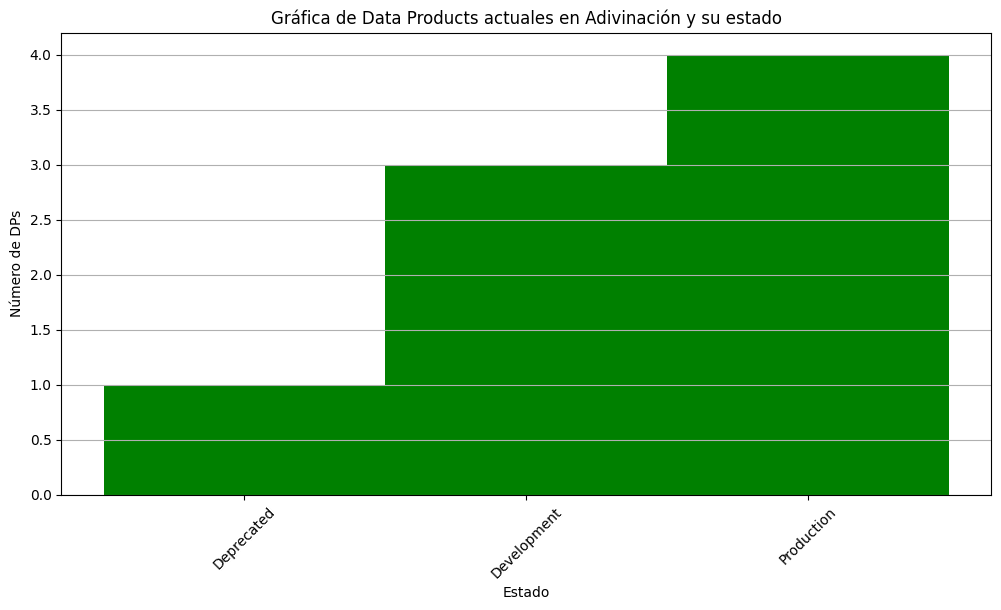

In [ ]:

plt.figure(figsize=(12, 6))
plt.bar(Grafica1Adiv['Status'], Grafica1Adiv['ID'], width=1
        , color='green')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Adivinación y su estado 1º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

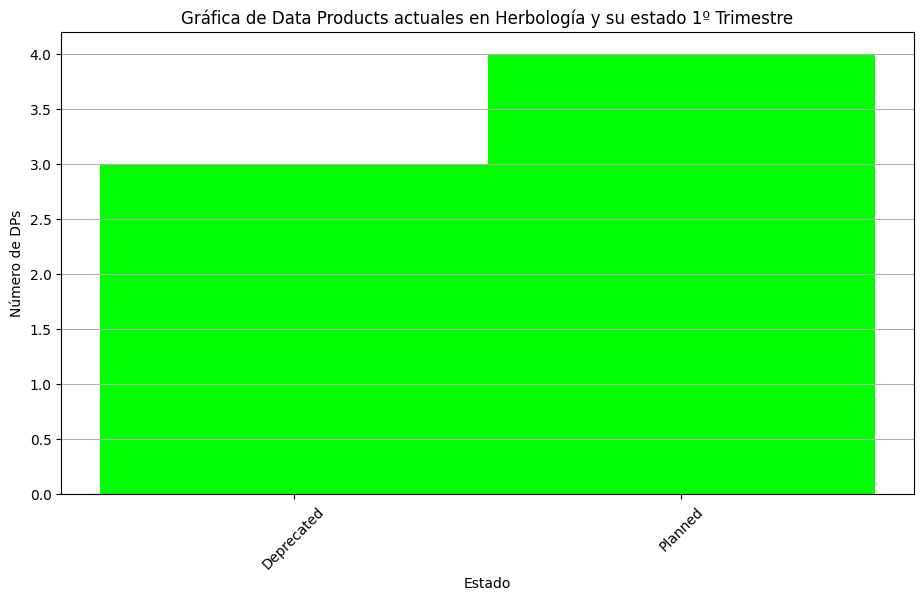

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica1Herb['Status'], Grafica1Herb['ID'], width=1
        , color='lime')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Herbología y su estado 1º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

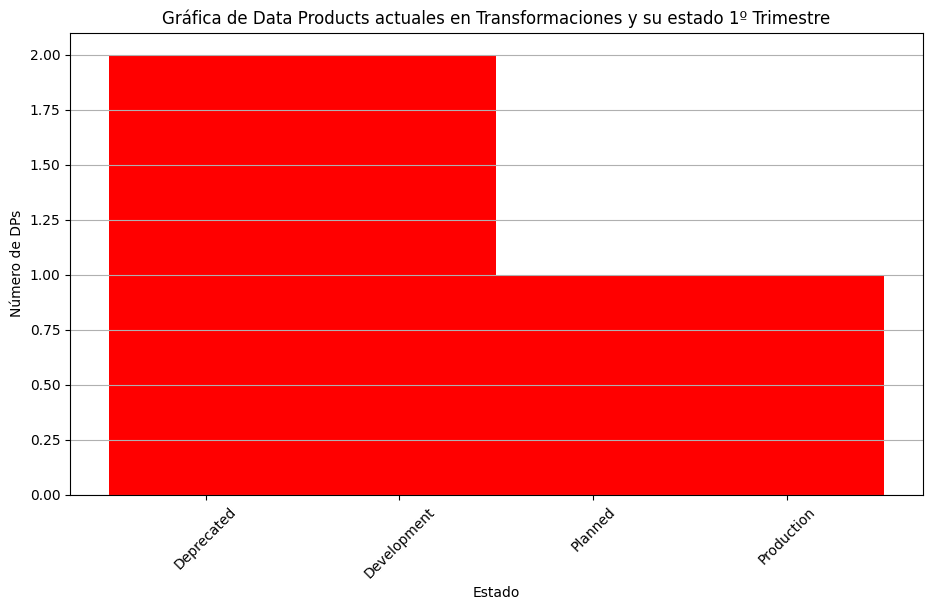

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica1Transf['Status'], Grafica1Transf['ID'], width=1
        , color='red')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Transformaciones y su estado 1º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

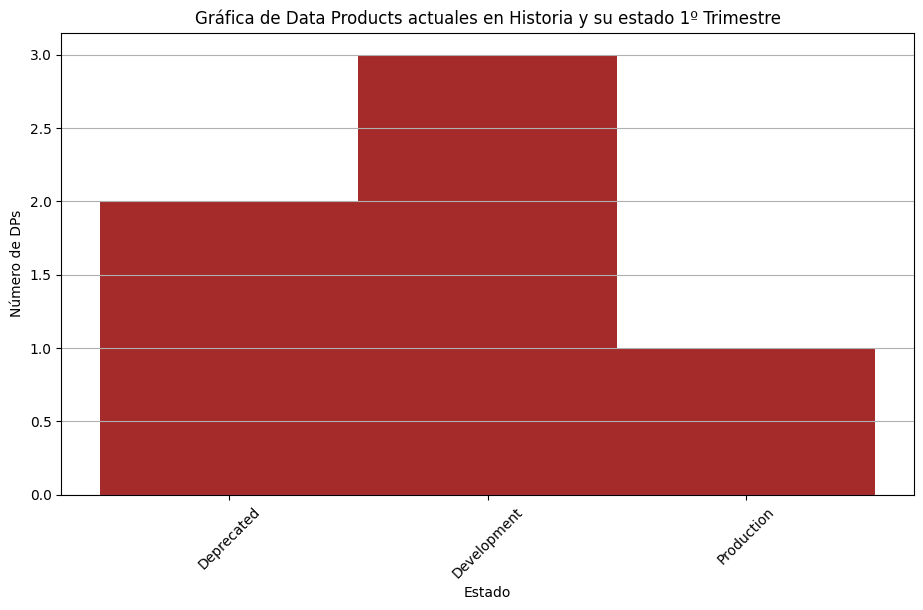

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica1Hist['Status'], Grafica1Hist['ID'], width=1
        , color='Brown')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Historia y su estado 1º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

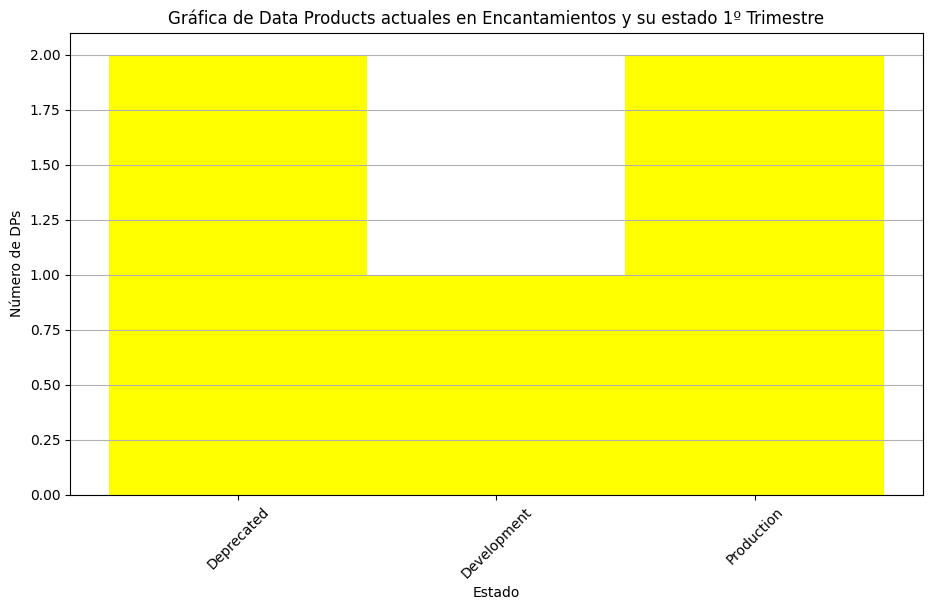

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica1Encan['Status'], Grafica1Encan['ID'], width=1
        , color='Yellow')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Encantamientos y su estado 1º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

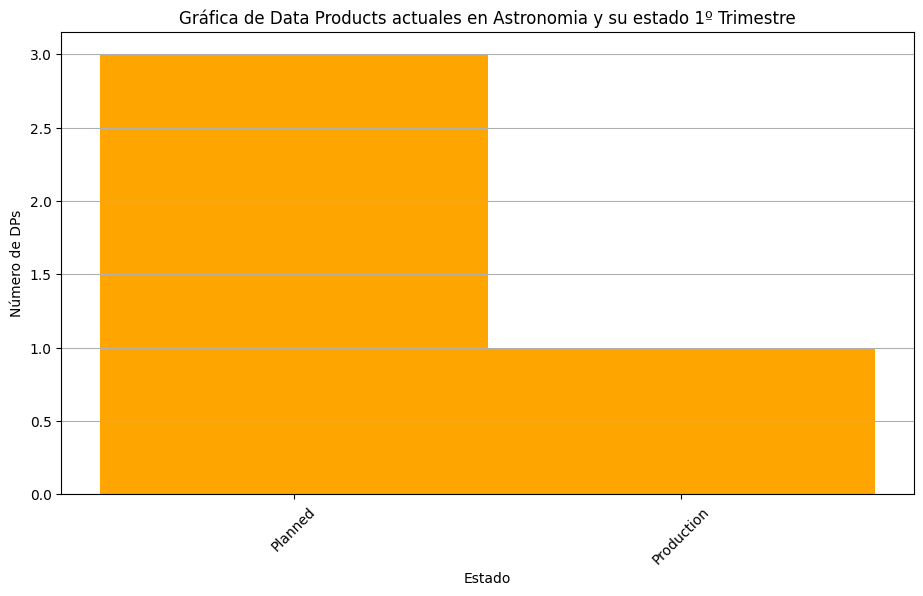

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica1Astronom['Status'], Grafica1Astronom['ID'], width=1
        , color='Orange')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Astronomia y su estado 1º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

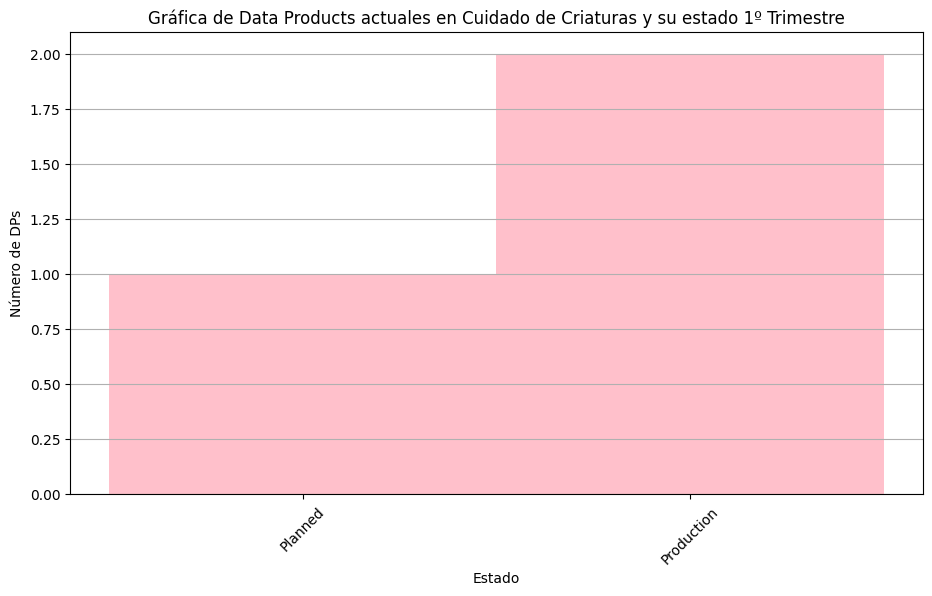

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica1Cuidado['Status'], Grafica1Cuidado['ID'], width=1
        , color='Pink')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Cuidado de Criaturas y su estado 1º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

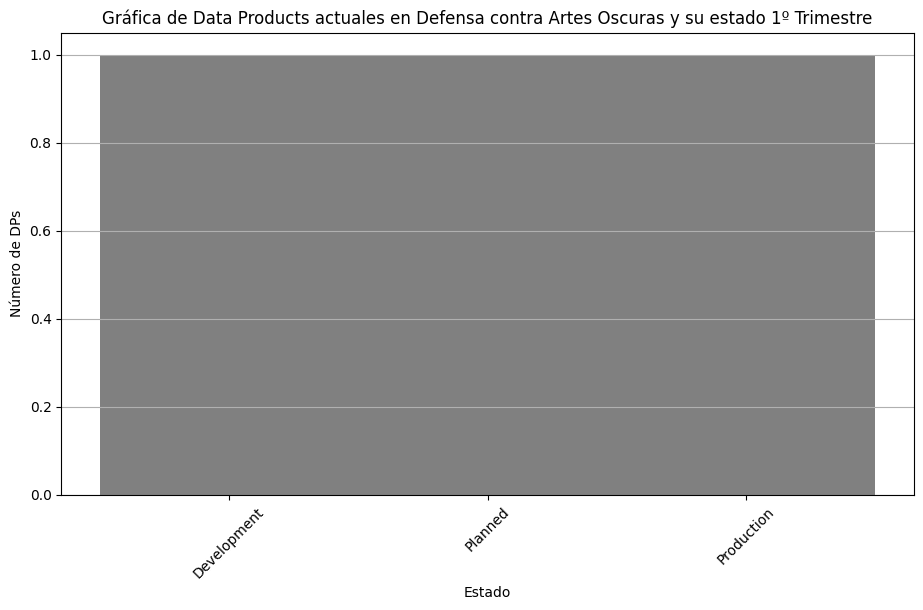

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica1Defensa['Status'], Grafica1Defensa['ID'], width=1
        , color='Grey')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Defensa contra Artes Oscuras y su estado 1º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# **Segundo Trimestre**

In [ ]:
Hog2.head(10)

,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers
0,DP001,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Production,1.4.0,46
1,DP002,CriaturaWatch,Sistema de Seguimiento de Hechizos,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,True,Production,2.6.9,100
2,DP003,EstelarMap,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.4.1,38
3,DP004,Transfigurator,Monitor de Pociones,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Development,2.9.6,99
4,DP005,CriaturaWatch,Vigilante de Criaturas Magicas,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,True,Production,2.3.7,51
5,DP006,EstelarMap,Guardian de la Historia,"Data Product relacionado con herbologia, utili...",Herbologia,Pomona Sprout,False,Planned,2.0.8,72
6,DP007,TrackHechizo,Mapa Estelar,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Deprecated,2.9.2,100
7,DP008,ProfeciaMonitor,Mapa Estelar,Data Product relacionado con historia de la ma...,Historia de la Magia,Cuthbert Binns,True,Development,0.0.1,33
8,DP009,HerboApp,Mapa Estelar,Data Product relacionado con cuidado de criatu...,Cuidado de Criaturas Magicas,Rubeus Hagrid,False,Production,2.3.7,74
9,DP010,Transfigurator,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.6.2,43


## ESTADO ACTUAL DE LOS DATAPRODUCTS

In [ ]:
pd.value_counts(Hog2['Domain'])

<ipython-input-4-92f9ef54993e>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(Hog2['Domain'])


,count
Domain,
Adivinacion,11
Pociones,10
Transformaciones,9
Herbologia,9
Historia de la Magia,9
Cuidado de Criaturas Magicas,6
Encantamientos,6
Astronomia,6
Defensa Contra las Artes Oscuras,4


In [ ]:
Adiv2T=Hog2.query('Domain == "Adivinacion"')[['ID','Domain','Status']]
Adiv2T.head(120)

,ID,Domain,Status
0,DP001,Adivinacion,Production
16,DP017,Adivinacion,Production
22,DP023,Adivinacion,Development
31,DP032,Adivinacion,Deprecated
32,DP033,Adivinacion,Production
35,DP036,Adivinacion,Production
36,DP037,Adivinacion,Development
45,DP046,Adivinacion,Development
51,DP052,Adivinacion,Planned
58,DP059,Adivinacion,Production


In [ ]:
Poci2T=Hog2.query('Domain == "Pociones"')[['ID','Domain','Status']]
Poci2T.head(120)

,ID,Domain,Status
1,DP002,Pociones,Production
2,DP003,Pociones,Deprecated
9,DP010,Pociones,Deprecated
12,DP013,Pociones,Development
14,DP015,Pociones,Planned
20,DP021,Pociones,Production
24,DP025,Pociones,Development
33,DP034,Pociones,Production
56,DP057,Pociones,Production
59,DP060,Pociones,Production


In [ ]:
Herb2T=Hog2.query('Domain == "Herbologia"')[['ID','Domain','Status']]
Herb2T.head(12)

,ID,Domain,Status
5,DP006,Herbologia,Planned
11,DP012,Herbologia,Planned
13,DP014,Herbologia,Deprecated
17,DP018,Herbologia,Deprecated
23,DP024,Herbologia,Planned
27,DP028,Herbologia,Planned
42,DP043,Herbologia,Deprecated
53,DP054,Herbologia,Production
57,DP058,Herbologia,Planned


In [ ]:
Transf2T=Hog2.query('Domain == "Transformaciones"')[['ID','Domain','Status']]
Transf2T.head(12)

,ID,Domain,Status
3,DP004,Transformaciones,Development
4,DP005,Transformaciones,Production
6,DP007,Transformaciones,Deprecated
37,DP038,Transformaciones,Development
40,DP041,Transformaciones,Planned
46,DP047,Transformaciones,Deprecated
60,DP061,Transformaciones,Deprecated
61,DP062,Transformaciones,Deprecated
67,DP068,Transformaciones,Production


In [ ]:
Hist2T=Hog2.query('Domain == "Historia de la Magia"')[['ID','Domain','Status']]
Hist2T.head(12)

,ID,Domain,Status
7,DP008,Historia de la Magia,Development
15,DP016,Historia de la Magia,Production
26,DP027,Historia de la Magia,Deprecated
29,DP030,Historia de la Magia,Development
43,DP044,Historia de la Magia,Development
44,DP045,Historia de la Magia,Deprecated
54,DP055,Historia de la Magia,Development
68,DP069,Historia de la Magia,Planned
69,DP070,Historia de la Magia,Planned


In [ ]:
Cuidado2T=Hog2.query('Domain == "Cuidado de Criaturas Magicas"')[['ID','Domain','Status']]
Cuidado2T.head(12)

,ID,Domain,Status
8,DP009,Cuidado de Criaturas Magicas,Production
21,DP022,Cuidado de Criaturas Magicas,Production
28,DP029,Cuidado de Criaturas Magicas,Planned
55,DP056,Cuidado de Criaturas Magicas,Production
64,DP065,Cuidado de Criaturas Magicas,Deprecated
66,DP067,Cuidado de Criaturas Magicas,Planned


In [ ]:
Encant2T=Hog2.query('Domain == "Encantamientos"')[['ID','Domain','Status']]
Encant2T.head(12)

,ID,Domain,Status
19,DP020,Encantamientos,Development
30,DP031,Encantamientos,Deprecated
34,DP035,Encantamientos,Production
38,DP039,Encantamientos,Production
48,DP049,Encantamientos,Deprecated
52,DP053,Encantamientos,Deprecated


In [ ]:
Astronom2T=Hog2.query('Domain == "Astronomia"')[['ID','Domain','Status']]
Astronom2T.head(12)

,ID,Domain,Status
25,DP026,Astronomia,Production
39,DP040,Astronomia,Planned
41,DP042,Astronomia,Planned
47,DP048,Astronomia,Planned
50,DP051,Astronomia,Development
65,DP066,Astronomia,Production


In [ ]:
Def2T=Hog2.query('Domain == "Defensa Contra las Artes Oscuras"')[['ID','Domain','Status']]
Def2T.head(12)

,ID,Domain,Status
10,DP011,Defensa Contra las Artes Oscuras,Production
18,DP019,Defensa Contra las Artes Oscuras,Development
49,DP050,Defensa Contra las Artes Oscuras,Planned
63,DP064,Defensa Contra las Artes Oscuras,Deprecated


## ANÁLISIS DE LOS DP'S EN PLANNED OR PRODUCTION

In [ ]:
  Def2T=Hog2.query('Domain == "Defensa Contra las Artes Oscuras" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Cuidado2T=Hog2.query('Domain == "Cuidado de Criaturas Magicas" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Astronom2T=Hog2.query('Domain == "Astronomia" and Status != "Development" and Status !="Deprecated"')[['ID','Domain','Status']]
Encant2T=Hog2.query('Domain == "Encantamientos" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Hist2T=Hog2.query('Domain == "Historia de la Magia" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Transf2T=Hog2.query('Domain == "Transformaciones" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Herb2T=Hog2.query('Domain == "Herbologia" and Status != "Development" and Status !="Deprecated"')[['ID','Domain','Status']]
Poci2T=Hog2.query('Domain == "Pociones" and Status != "Development" and Status !="Deprecated"')[['ID','Domain','Status']]
Adiv2T=Hog2.query('Domain == "Adivinacion" and Status != "Development" and Status !="Deprecated"')[['ID','Domain','Status']]

In [ ]:
def Categorized(IsCompliance, Status):
    if Status == "Planned"  and IsCompliance == True:
        return 'Compliant'  # Return 'Compliant' if conditions are met
    elif Status == "Production"  and IsCompliance == True:
        return 'Compliant'  # Return 'Compliant' if conditions are met
    elif Status == "Production" and IsCompliance == False:
        return 'Non-Compliant'  # Return 'Non-Compliant' otherwise
    elif Status == "Planned" and IsCompliance == False:
        return 'Non-Compliant'  # Return 'Non-Compliant' otherwise
    else:
        return 'Dont Care'  # Return 'Unknown' if no conditions are met

Hog2['Analysis'] = Hog2.apply(lambda row: Categorized(row['IsCompliance'], row['Status']), axis=1)
Hog2.head(15)

,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers,Analysis
0,DP001,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Production,1.4.0,46,Compliant
1,DP002,CriaturaWatch,Sistema de Seguimiento de Hechizos,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,True,Production,2.6.9,100,Compliant
2,DP003,EstelarMap,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.4.1,38,Dont Care
3,DP004,Transfigurator,Monitor de Pociones,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Development,2.9.6,99,Dont Care
4,DP005,CriaturaWatch,Vigilante de Criaturas Magicas,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,True,Production,2.3.7,51,Compliant
5,DP006,EstelarMap,Guardian de la Historia,"Data Product relacionado con herbologia, utili...",Herbologia,Pomona Sprout,False,Planned,2.0.8,72,Non-Compliant
6,DP007,TrackHechizo,Mapa Estelar,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Deprecated,2.9.2,100,Dont Care
7,DP008,ProfeciaMonitor,Mapa Estelar,Data Product relacionado con historia de la ma...,Historia de la Magia,Cuthbert Binns,True,Development,0.0.1,33,Dont Care
8,DP009,HerboApp,Mapa Estelar,Data Product relacionado con cuidado de criatu...,Cuidado de Criaturas Magicas,Rubeus Hagrid,False,Production,2.3.7,74,Non-Compliant
9,DP010,Transfigurator,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.6.2,43,Dont Care


In [ ]:
#Cuantos Data products son compilance
DpCompilance2T=Hog2.query('Analysis == "Compliant"')
DpCompilance2T['Analysis'].count()

22

In [ ]:
AdivUsers2T=Hog2.query('Analysis == "Compliant" and Domain == "Adivinacion"')
print("En adivinación hay" , AdivUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

PociUsers2T=Hog2.query('Analysis == "Compliant" and Domain == "Pociones"')
print("En Pociones hay" , PociUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

HerbUsers2T=Hog2.query('Analysis == "Compliant" and Domain == "Herbologia"')
print("En Herbología hay" , HerbUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

TransfUsers2T=Hog2.query('Analysis == "Compliant" and Domain == "Transformaciones"')
print("En Transformaciones hay" , TransfUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

HistUsers2T=Hog2.query('Analysis == "Compliant" and Domain == "Historia de la Magia"')
print("En Historia de la Magia hay" , HistUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

EncantUsers2T=Hog2.query('Analysis == "Compliant" and Domain == "Encantamientos"')
print("En Encantamientos hay" , EncantUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

AstronomUsers2T=Hog2.query('Analysis == "Compliant" and Domain == "Astronomia"')
print("En Astronomía hay" , AstronomUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

CuidadoUsers2T=Hog2.query('Analysis == "Compliant" and Domain == "Cuidado de Criaturas Magicas"')
print("En Cuidado de Criaturas Magicas hay" , CuidadoUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")


DefensaUsers2T=Hog2.query('Analysis == "Compliant" and Domain == "Defensa Contra las Artes Oscuras"')
print("En Defensa Contra las Artes Oscuras hay" , DefensaUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

En adivinación hay 370 magos que usan Esos DP
En Pociones hay 345 magos que usan Esos DP
En Herbología hay 0 magos que usan Esos DP
En Transformaciones hay 99 magos que usan Esos DP
En Historia de la Magia hay 100 magos que usan Esos DP
En Encantamientos hay 200 magos que usan Esos DP
En Astronomía hay 295 magos que usan Esos DP
En Cuidado de Criaturas Magicas hay 79 magos que usan Esos DP
En Defensa Contra las Artes Oscuras hay 177 magos que usan Esos DP


In [ ]:
TotalUsers2T = AdivUsers2T['NumberUsers'].sum() + PociUsers2T['NumberUsers'].sum() + HerbUsers2T['NumberUsers'].sum() + TransfUsers2T['NumberUsers'].sum() + HistUsers2T['NumberUsers'].sum() + EncantUsers2T['NumberUsers'].sum() + AstronomUsers2T['NumberUsers'].sum() + CuidadoUsers2T['NumberUsers'].sum() + DefensaUsers2T['NumberUsers'].sum()

In [ ]:
#Suma los valore unicos de la columna domain es decir el numero de domains que existen
UsersPerDomain2T = TotalUsers2T / Hog2['Domain'].nunique()
UsersPerDomain2T

185.0

In [ ]:
#Usuarios con hechizos que no cumplen las normas

AdivUsers2T=Hog2.query('Analysis == "Non-Compliant" and Domain == "Adivinacion"')
print("En adivinación hay" , AdivUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

PociUsers2T=Hog2.query('Analysis == "Non-Compliant" and Domain == "Pociones"')
print("En Pociones hay" , PociUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

HerbUsers2T=Hog2.query('Analysis == "Non-Compliant" and Domain == "Herbologia"')
print("En Herbología hay" , HerbUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

TransfUsers2T=Hog2.query('Analysis == "Non-Compliant" and Domain == "Transformaciones"')
print("En Transformaciones hay" , TransfUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

HistUsers2T=Hog2.query('Analysis == "Non-Compliant" and Domain == "Historia de la Magia"')
print("En Historia de la Magia hay" , HistUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

EncantUsers2T=Hog2.query('Analysis == "Non-Compliant" and Domain == "Encantamientos"')
print("En Encantamientos hay" , EncantUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

AstronomUsers2T=Hog2.query('Analysis == "Non-Compliant" and Domain == "Astronomia"')
print("En Astronomía hay" , AstronomUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

CuidadoUsers2T=Hog2.query('Analysis == "Non-Compliant" and Domain == "Cuidado de Criaturas Magicas"')
print("En Cuidado de Criaturas Magicas hay" , CuidadoUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")


DefensaUsers2T=Hog2.query('Analysis == "Non-Compliant" and Domain == "Defensa Contra las Artes Oscuras"')
print("En Defensa Contra las Artes Oscuras hay" , DefensaUsers2T['NumberUsers'].sum(), "magos que usan Esos DP")

En adivinación hay 113 magos que usan Esos DP
En Pociones hay 23 magos que usan Esos DP
En Herbología hay 468 magos que usan Esos DP
En Transformaciones hay 27 magos que usan Esos DP
En Historia de la Magia hay 90 magos que usan Esos DP
En Encantamientos hay 0 magos que usan Esos DP
En Astronomía hay 168 magos que usan Esos DP
En Cuidado de Criaturas Magicas hay 183 magos que usan Esos DP
En Defensa Contra las Artes Oscuras hay 0 magos que usan Esos DP


## ANÁLISIS DE LOS DP'S EN ESTADO DEPRECATED

In [ ]:
 Defensa2T=Hog2.query('Domain == "Defensa Contra las Artes Oscuras" and Status == "Deprecated"  ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Defensa hay", Defensa2T['Status'].count(), "Deprecated DP's y ",Defensa2T['NumberUsers'].sum(),"que los siguen usando")
Cuidado2T=Hog2.query('Domain == "Cuidado de Criaturas Magicas" and Status == "Deprecated" ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Cuidado hay", Cuidado2T['Status'].count(), "Deprecated DP's y ",Cuidado2T['NumberUsers'].sum(),"que los siguen usando")
Astronom2T=Hog2.query('Domain == "Astronomia" and Status == "Deprecated" ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Astronomía hay", Astronom2T['Status'].count(), "Deprecated DP's y ",Astronom2T['NumberUsers'].sum(),"que los siguen usando")
Encant2T=Hog2.query('Domain == "Encantamientos" and Status == "Deprecated" ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Encantamientos hay", Encant2T['Status'].count(), "Deprecated DP's y ",Encant2T['NumberUsers'].sum(),"que los siguen usando")
Hist2T=Hog2.query('Domain == "Historia de la Magia" and Status == "Deprecated"  ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Historia hay", Hist2T['Status'].count(), "Deprecated DP's y ", Hist2T['NumberUsers'].sum(), "que los siguen usando")
Transf2T=Hog2.query('Domain == "Transformaciones" and Status == "Deprecated"')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Transformaciones hay", Transf2T['Status'].count(), "Deprecated DP's y " ,Transf2T['NumberUsers'].sum(),"que los siguen usando")
Herb2T=Hog2.query('Domain == "Herbologia" and Status == "Deprecated" ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Herbología hay", Herb2T['Status'].count(), "Deprecated DP's y ", Herb2T['NumberUsers'].sum(),"que los siguen usando")
Poci2T=Hog2.query('Domain == "Pociones" and Status == "Deprecated"')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Pociones hay", Poci2T['Status'].count(), "Deprecated DP's y " ,Poci2T['NumberUsers'].sum(),"que los siguen usando")
Adiv2T=Hog2.query('Domain == "Adivinacion" and Status == "Deprecated"')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Adivinación hay", Adiv2T['Status'].count(), "Deprecated DP's y ", Adiv2T['NumberUsers'].sum(),"que los siguen usando")

En el dominio Defensa hay 1 Deprecated DP's y  41 que los siguen usando
En el dominio Cuidado hay 1 Deprecated DP's y  55 que los siguen usando
En el dominio Astronomía hay 0 Deprecated DP's y  0 que los siguen usando
En el dominio Encantamientos hay 3 Deprecated DP's y  139 que los siguen usando
En el dominio Historia hay 2 Deprecated DP's y  97 que los siguen usando
En el dominio Transformaciones hay 4 Deprecated DP's y  324 que los siguen usando
En el dominio Herbología hay 3 Deprecated DP's y  170 que los siguen usando
En el dominio Pociones hay 2 Deprecated DP's y  81 que los siguen usando
En el dominio Adivinación hay 1 Deprecated DP's y  52 que los siguen usando


## ANÁLISIS DE LOS OWNERS 2º TRIMESTRE

In [ ]:
funcionarios2T = Hog2[['Owner', 'Domain', 'Status']] # Use a list of column names within double brackets
funcionarios2T.head(10)

,Owner,Domain,Status
0,Sybill Trelawney,Adivinacion,Production
1,Severus Snape,Pociones,Production
2,Severus Snape,Pociones,Deprecated
3,Minerva McGonagall,Transformaciones,Development
4,Minerva McGonagall,Transformaciones,Production
5,Pomona Sprout,Herbologia,Planned
6,Minerva McGonagall,Transformaciones,Deprecated
7,Cuthbert Binns,Historia de la Magia,Development
8,Rubeus Hagrid,Cuidado de Criaturas Magicas,Production
9,Severus Snape,Pociones,Deprecated


In [ ]:
#Pregunto a mi nuevo df cuantos funcionarios hay
funcionarios2T['Owner'].nunique()

12

In [ ]:
products_by_owner_status2T = Hog2.groupby(['Owner', 'Status'])['ID'].count().reset_index()
products_by_owner_status2T.rename(columns={'ID': 'NumProducts'}, inplace=True)

print(products_by_owner_status2T)

                       Owner       Status  NumProducts
0              Alastor Moody   Deprecated            1
1              Alastor Moody   Production            1
2            Aurora Sinistra  Development            1
3            Aurora Sinistra      Planned            3
4            Aurora Sinistra   Production            2
5             Cuthbert Binns   Deprecated            2
6             Cuthbert Binns  Development            4
7             Cuthbert Binns      Planned            2
8             Cuthbert Binns   Production            1
9            Filius Flitwick   Deprecated            3
10           Filius Flitwick  Development            1
11           Filius Flitwick   Production            2
12                   Firenze  Development            1
13                   Firenze   Production            3
14           Horace Slughorn  Development            1
15           Horace Slughorn      Planned            1
16           Horace Slughorn   Production            2
17        

In [ ]:
products_by_owner_status2T = Hog2.groupby(['Owner', 'Status','Domain','NumberUsers'])['ID'].count().reset_index()
print(products_by_owner_status2T)

                       Owner       Status                            Domain  \
0              Alastor Moody   Deprecated  Defensa Contra las Artes Oscuras   
1              Alastor Moody   Production  Defensa Contra las Artes Oscuras   
2            Aurora Sinistra  Development                        Astronomia   
3            Aurora Sinistra      Planned                        Astronomia   
4            Aurora Sinistra      Planned                        Astronomia   
..                       ...          ...                               ...   
59          Sybill Trelawney   Production                       Adivinacion   
60          Sybill Trelawney   Production                       Adivinacion   
61          Sybill Trelawney   Production                       Adivinacion   
62  Wilhelmina Grubbly-Plank   Deprecated      Cuidado de Criaturas Magicas   
63  Wilhelmina Grubbly-Plank   Production      Cuidado de Criaturas Magicas   

    NumberUsers  ID  
0            41   1  
1      

In [ ]:
#Número total de hechizos por Owner
TotalIDs2T=products_by_owner_status2T.groupby(['Owner'])['ID'].sum()
print(TotalIDs2T)

Owner
Alastor Moody               2
Aurora Sinistra             6
Cuthbert Binns              9
Filius Flitwick             6
Firenze                     4
Horace Slughorn             4
Minerva McGonagall          9
Pomona Sprout               9
Rubeus Hagrid               4
Severus Snape               8
Sybill Trelawney            7
Wilhelmina Grubbly-Plank    2
Name: ID, dtype: int64


In [ ]:
UsuariosMax2T=products_by_owner_status2T.query('Status == "Planned" or Status == "Production"')[['ID','Owner','Domain','Status','NumberUsers']]
UsuariosMax2T.head(10)

,ID,Owner,Domain,Status,NumberUsers
1,1,Alastor Moody,Defensa Contra las Artes Oscuras,Production,96
3,1,Aurora Sinistra,Astronomia,Planned,68
4,2,Aurora Sinistra,Astronomia,Planned,100
5,1,Aurora Sinistra,Astronomia,Production,95
6,1,Aurora Sinistra,Astronomia,Production,100
13,1,Cuthbert Binns,Historia de la Magia,Planned,34
14,1,Cuthbert Binns,Historia de la Magia,Planned,100
15,1,Cuthbert Binns,Historia de la Magia,Production,56
20,2,Filius Flitwick,Encantamientos,Production,100
22,1,Firenze,Adivinacion,Production,50


In [ ]:
#Owners con mas usuarios usando los hechizos en Planned or Production
UsuariosMax2T.groupby(['Domain','Owner'])['NumberUsers'].sum()

Domain                            Owner                   
Adivinacion                       Firenze                     216
                                  Sybill Trelawney            267
Astronomia                        Aurora Sinistra             363
Cuidado de Criaturas Magicas      Rubeus Hagrid               247
                                  Wilhelmina Grubbly-Plank     15
Defensa Contra las Artes Oscuras  Alastor Moody                96
                                  Severus Snape                81
Encantamientos                    Filius Flitwick             100
Herbologia                        Pomona Sprout               268
Historia de la Magia              Cuthbert Binns              190
Pociones                          Horace Slughorn             189
                                  Severus Snape               179
Transformaciones                  Minerva McGonagall          126
Name: NumberUsers, dtype: int64

In [ ]:
LessProductive2T=products_by_owner_status2T.query('Status == "Deprecated"')[['ID','Owner','Domain','Status','NumberUsers']]
LessProductive2T.head(10)

,ID,Owner,Domain,Status,NumberUsers
0,1,Alastor Moody,Defensa Contra las Artes Oscuras,Deprecated,41
7,1,Cuthbert Binns,Historia de la Magia,Deprecated,39
8,1,Cuthbert Binns,Historia de la Magia,Deprecated,58
16,1,Filius Flitwick,Encantamientos,Deprecated,17
17,1,Filius Flitwick,Encantamientos,Deprecated,51
18,1,Filius Flitwick,Encantamientos,Deprecated,71
29,1,Minerva McGonagall,Transformaciones,Deprecated,24
30,3,Minerva McGonagall,Transformaciones,Deprecated,100
36,1,Pomona Sprout,Herbologia,Deprecated,20
37,1,Pomona Sprout,Herbologia,Deprecated,50


In [ ]:
LessProductive2T=LessProductive2T.groupby(['Domain','Owner'])['ID'].sum()
LessProductive2T.head(10)

,,ID
Domain,Owner,
Adivinacion,Sybill Trelawney,1
Cuidado de Criaturas Magicas,Wilhelmina Grubbly-Plank,1
Defensa Contra las Artes Oscuras,Alastor Moody,1
Encantamientos,Filius Flitwick,3
Herbologia,Pomona Sprout,3
Historia de la Magia,Cuthbert Binns,2
Pociones,Severus Snape,2
Transformaciones,Minerva McGonagall,4


In [ ]:
print("La productividad de Sybill Trelawney es de un", LessProductive2T.loc[('Adivinacion','Sybill Trelawney')] / TotalIDs2T.loc['Sybill Trelawney'])

print("La productividad de Filius Flitwick es de un", LessProductive2T.loc[('Encantamientos','Filius Flitwick')] / TotalIDs2T.loc['Filius Flitwick'])

print("La productividad de Wilhemina es de un", LessProductive2T.loc[('Cuidado de Criaturas Magicas','Wilhelmina Grubbly-Plank')] / TotalIDs2T.loc['Wilhelmina Grubbly-Plank'])

print("La productividad de Pomona Sprout es de un", LessProductive2T.loc[('Herbologia','Pomona Sprout')] / TotalIDs2T.loc['Pomona Sprout'])

print("La productividad de Cuthbert Binns es de un", LessProductive2T.loc[('Historia de la Magia','Cuthbert Binns')] / TotalIDs2T.loc['Cuthbert Binns'])

print("La productividad de Severus Snape es de un", LessProductive2T.loc[('Pociones','Severus Snape')] / TotalIDs2T.loc['Severus Snape'])

print("La productividad de Alastor Moody es de un", LessProductive2T.loc[('Defensa contra las Artes Oscuras','Alastor Moody')] / TotalIDs2T.loc['Alastor Moody'])

print("La productividad de Minerva McGonagall es de un", LessProductive2T.loc[('Transformaciones','Minerva McGonagall')] / TotalIDs2T.loc['Minerva McGonagall'])

NameError: name 'LessProductive2T' is not defined

In [ ]:
#Comprobamos si hay polifacético contanto el número de dominios por owner
Polifaceticos2T =  Hog2.groupby(['Owner'])['Domain'].nunique().reset_index()
Polifaceticos2T.head(15)

,Owner,Domain
0,Alastor Moody,1
1,Aurora Sinistra,1
2,Cuthbert Binns,1
3,Filius Flitwick,1
4,Firenze,1
5,Horace Slughorn,1
6,Minerva McGonagall,1
7,Pomona Sprout,1
8,Rubeus Hagrid,1
9,Severus Snape,2


In [ ]:
print("Efectivamente, como se puede observar Severus Snape es Polifacético y bastante feo también")

Efectivamente, como se puede observar Severus Snape es Polifacético y bastante feo también


## GRÁFICAS DP'S POR DOMINOIO Y ESTADO 2T

In [ ]:
Grafica2 = Hog2.groupby([ 'Domain','Status'])['ID'].count().reset_index()
Grafica2Adiv = Grafica2.query('Domain == "Adivinacion"')
Grafica2Poci = Grafica2.query('Domain == "Pociones"')
Grafica2Herb = Grafica2.query('Domain == "Herbologia"')
Grafica2Transf = Grafica2.query('Domain == "Transformaciones"')
Grafica2Hist = Grafica2.query('Domain == "Historia de la Magia"')
Grafica2Encan = Grafica2.query('Domain == "Encantamientos"')
Grafica2Astronom = Grafica2.query('Domain == "Astronomia"')
Grafica2Cuidado = Grafica2.query('Domain == "Cuidado de Criaturas Magicas"')
Grafica2Defensa = Grafica2.query('Domain == "Defensa Contra las Artes Oscuras"')
Grafica2Astronom.head()


,Domain,Status,ID
4,Astronomia,Development,1
5,Astronomia,Planned,3
6,Astronomia,Production,2


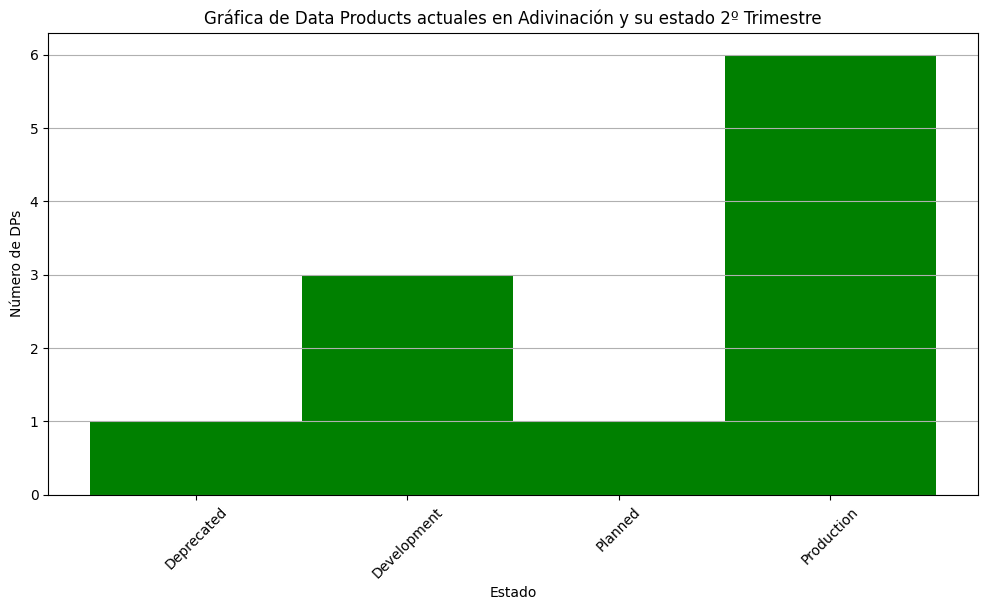

In [ ]:

plt.figure(figsize=(12, 6))
plt.bar(Grafica2Adiv['Status'], Grafica2Adiv['ID'], width=1
        , color='green')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Adivinación y su estado 2º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

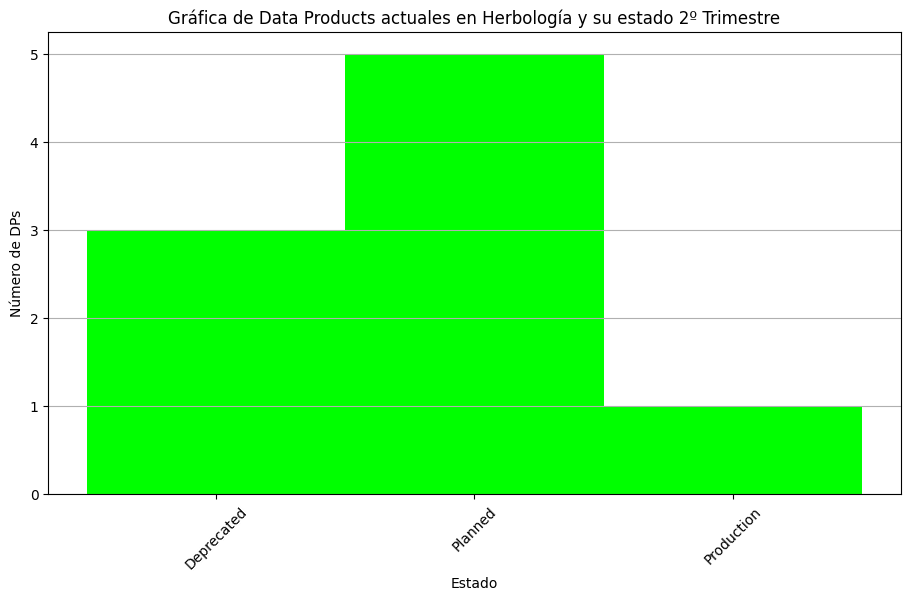

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica2Herb['Status'], Grafica2Herb['ID'], width=1
        , color='lime')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Herbología y su estado 2º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

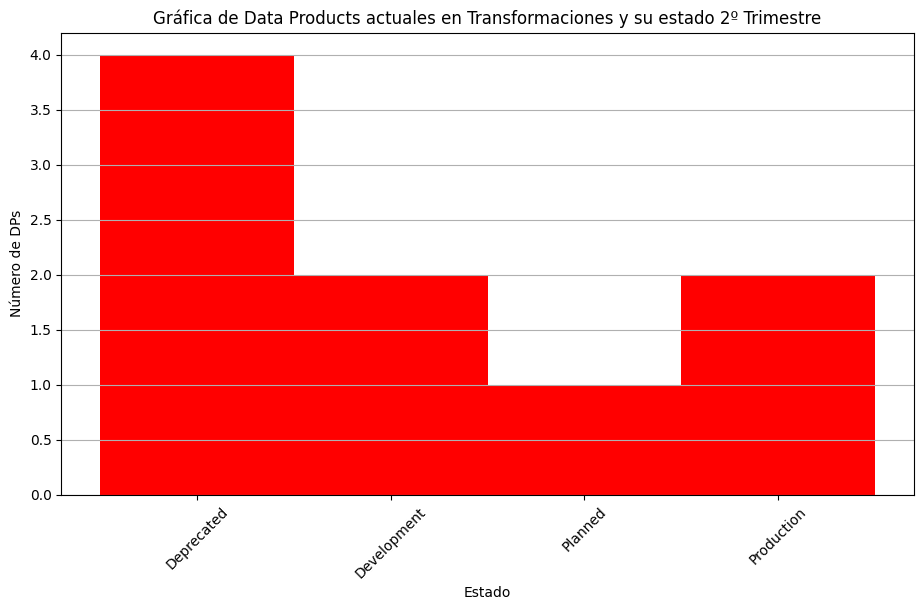

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica2Transf['Status'], Grafica2Transf['ID'], width=1
        , color='red')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Transformaciones y su estado 2º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

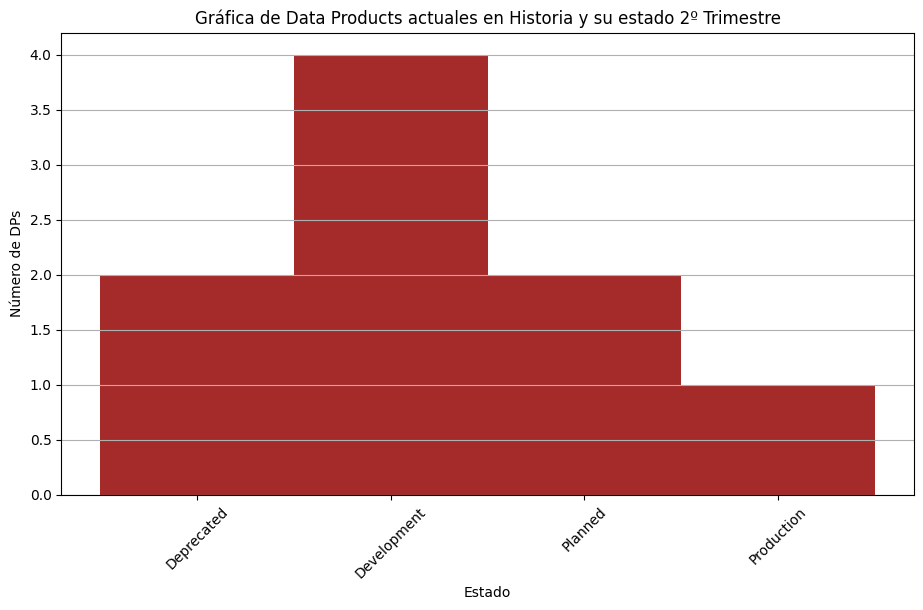

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica2Hist['Status'], Grafica2Hist['ID'], width=1
        , color='Brown')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Historia y su estado 2º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

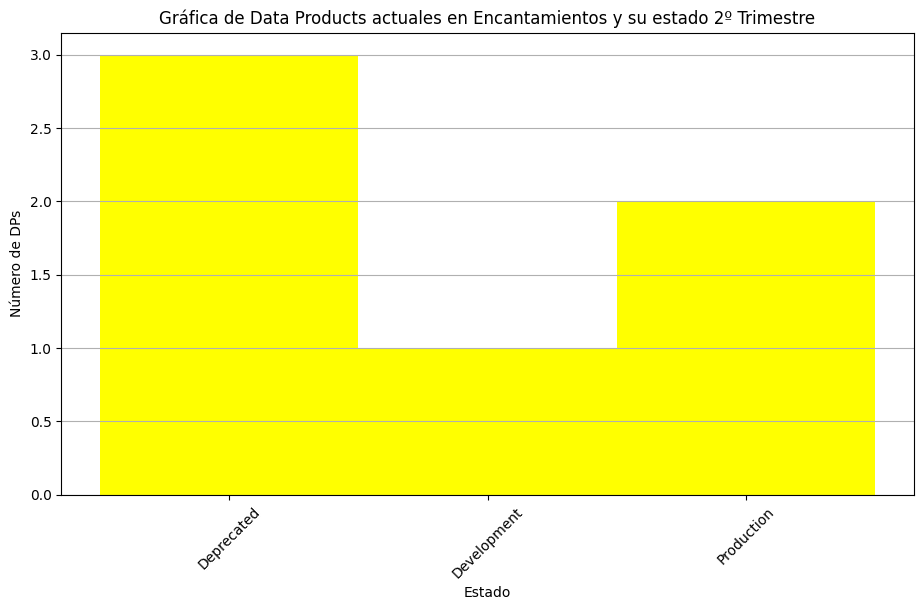

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica2Encan['Status'], Grafica2Encan['ID'], width=1
        , color='Yellow')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Encantamientos y su estado 2º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

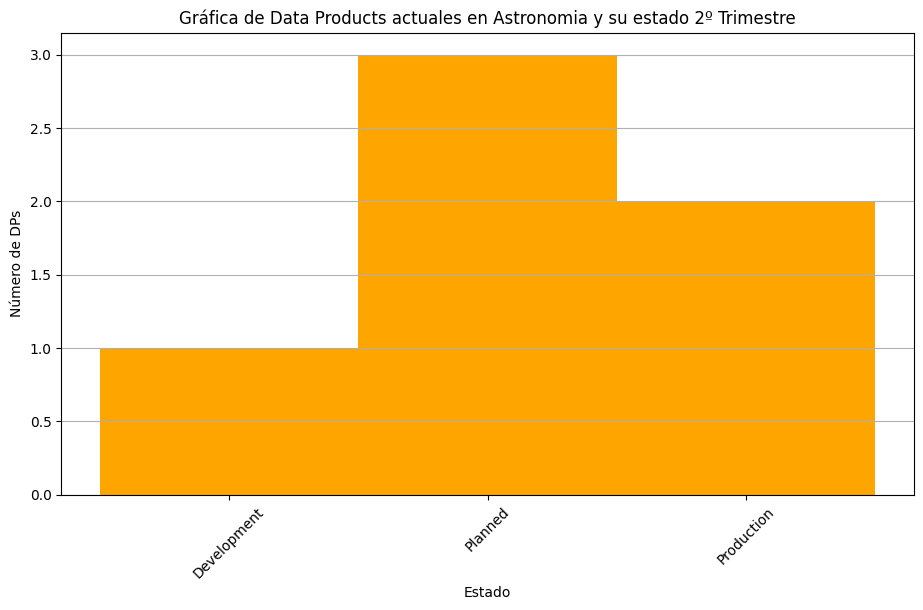

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica2Astronom['Status'], Grafica2Astronom['ID'], width=1
        , color='Orange')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Astronomia y su estado 2º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

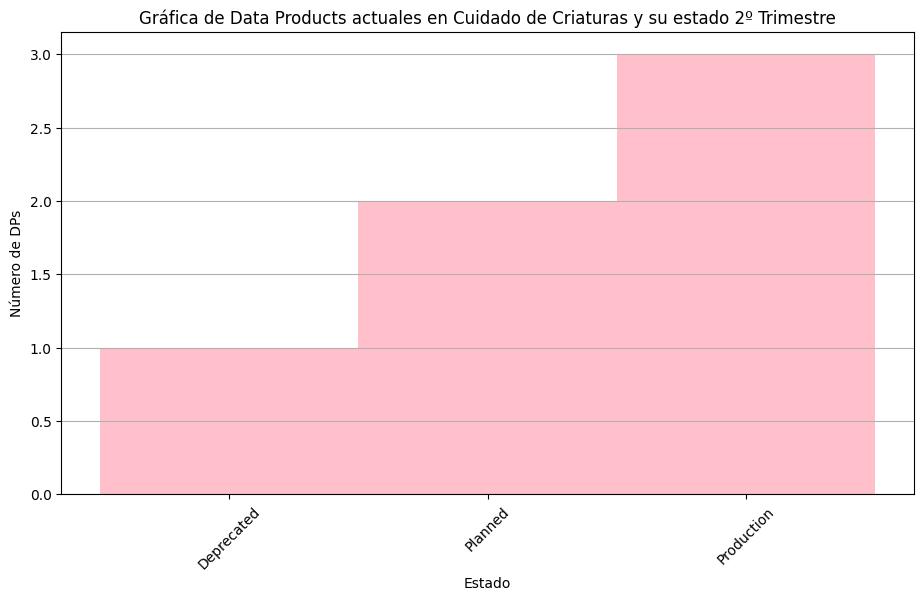

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica2Cuidado['Status'], Grafica2Cuidado['ID'], width=1
        , color='Pink')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Cuidado de Criaturas y su estado 2º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

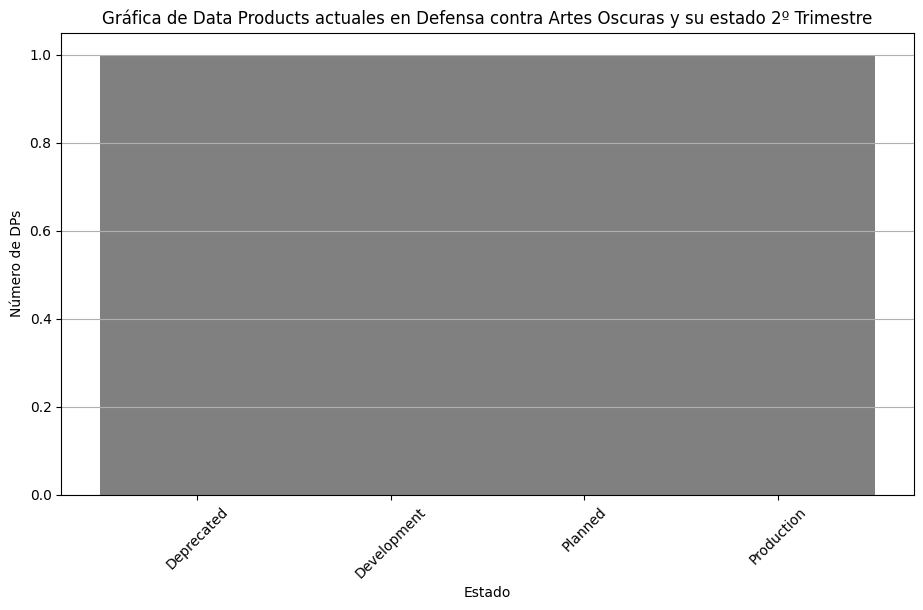

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica2Defensa['Status'], Grafica2Defensa['ID'], width=1
        , color='Grey')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Defensa contra Artes Oscuras y su estado 2º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# **Tercer Trimestre**

In [ ]:
Hog3.head(10)

,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers
0,DP001,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Production,1.4.0,46
1,DP002,CriaturaWatch,Sistema de Seguimiento de Hechizos,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,True,Production,2.6.9,100
2,DP003,EstelarMap,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.4.1,38
3,DP004,Transfigurator,Monitor de Pociones,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Development,2.9.6,99
4,DP005,CriaturaWatch,Vigilante de Criaturas Magicas,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,True,Production,2.3.7,51
5,DP006,EstelarMap,Guardian de la Historia,"Data Product relacionado con herbologia, utili...",Herbologia,Pomona Sprout,False,Planned,2.0.8,72
6,DP007,TrackHechizo,Mapa Estelar,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Deprecated,2.9.2,100
7,DP008,ProfeciaMonitor,Mapa Estelar,Data Product relacionado con historia de la ma...,Historia de la Magia,Cuthbert Binns,True,Development,0.0.1,33
8,DP009,HerboApp,Mapa Estelar,Data Product relacionado con cuidado de criatu...,Cuidado de Criaturas Magicas,Rubeus Hagrid,False,Production,2.3.7,74
9,DP010,Transfigurator,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.6.2,43


## ESTADO ACTUAL DE LOS DP'S

In [ ]:
pd.value_counts(Hog3['Domain'])

<ipython-input-6-f261c0cd45c6>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(Hog3['Domain'])


,count
Domain,
Adivinacion,13
Historia de la Magia,12
Pociones,11
Herbologia,10
Defensa Contra las Artes Oscuras,10
Transformaciones,9
Encantamientos,8
Cuidado de Criaturas Magicas,7
Astronomia,7


In [ ]:
Adiv3T=Hog3.query('Domain == "Adivinacion"')[['ID','Domain','Status']]
Adiv3T.head(120)

,ID,Domain,Status
0,DP001,Adivinacion,Production
16,DP017,Adivinacion,Production
22,DP023,Adivinacion,Development
31,DP032,Adivinacion,Deprecated
32,DP033,Adivinacion,Production
35,DP036,Adivinacion,Production
36,DP037,Adivinacion,Development
45,DP046,Adivinacion,Development
51,DP052,Adivinacion,Planned
58,DP059,Adivinacion,Production


In [ ]:
Poci3T=Hog3.query('Domain == "Pociones"')[['ID','Domain','Status']]
Poci3T.head(120)

,ID,Domain,Status
1,DP002,Pociones,Production
2,DP003,Pociones,Deprecated
9,DP010,Pociones,Deprecated
12,DP013,Pociones,Development
14,DP015,Pociones,Planned
20,DP021,Pociones,Production
24,DP025,Pociones,Development
33,DP034,Pociones,Production
56,DP057,Pociones,Production
59,DP060,Pociones,Production


In [ ]:
Herb3T=Hog3.query('Domain == "Herbologia"')[['ID','Domain','Status']]
Herb3T.head(12)

,ID,Domain,Status
5,DP006,Herbologia,Planned
11,DP012,Herbologia,Planned
13,DP014,Herbologia,Deprecated
17,DP018,Herbologia,Deprecated
23,DP024,Herbologia,Planned
27,DP028,Herbologia,Planned
42,DP043,Herbologia,Deprecated
53,DP054,Herbologia,Production
57,DP058,Herbologia,Planned
81,DP082,Herbologia,Planned


In [ ]:
Transf3T=Hog3.query('Domain == "Transformaciones"')[['ID','Domain','Status']]
Transf3T.head(12)

,ID,Domain,Status
3,DP004,Transformaciones,Development
4,DP005,Transformaciones,Production
6,DP007,Transformaciones,Deprecated
37,DP038,Transformaciones,Development
40,DP041,Transformaciones,Planned
46,DP047,Transformaciones,Deprecated
60,DP061,Transformaciones,Deprecated
61,DP062,Transformaciones,Deprecated
67,DP068,Transformaciones,Production


In [ ]:
Hist3T=Hog3.query('Domain == "Historia de la Magia"')[['ID','Domain','Status']]
Hist3T.head(120)

,ID,Domain,Status
7,DP008,Historia de la Magia,Development
15,DP016,Historia de la Magia,Production
26,DP027,Historia de la Magia,Deprecated
29,DP030,Historia de la Magia,Development
43,DP044,Historia de la Magia,Development
44,DP045,Historia de la Magia,Deprecated
54,DP055,Historia de la Magia,Development
68,DP069,Historia de la Magia,Planned
69,DP070,Historia de la Magia,Planned
75,DP076,Historia de la Magia,Deprecated


In [ ]:
Cuidado3T=Hog3.query('Domain == "Cuidado de Criaturas Magicas"')[['ID','Domain','Status']]
Cuidado3T.head(12)

,ID,Domain,Status
8,DP009,Cuidado de Criaturas Magicas,Production
21,DP022,Cuidado de Criaturas Magicas,Production
28,DP029,Cuidado de Criaturas Magicas,Planned
55,DP056,Cuidado de Criaturas Magicas,Production
64,DP065,Cuidado de Criaturas Magicas,Deprecated
66,DP067,Cuidado de Criaturas Magicas,Planned
77,DP078,Cuidado de Criaturas Magicas,Deprecated


In [ ]:
Encant3T=Hog3.query('Domain == "Encantamientos"')[['ID','Domain','Status']]
Encant3T.head(12)

,ID,Domain,Status
19,DP020,Encantamientos,Development
30,DP031,Encantamientos,Deprecated
34,DP035,Encantamientos,Production
38,DP039,Encantamientos,Production
48,DP049,Encantamientos,Deprecated
52,DP053,Encantamientos,Deprecated
76,DP077,Encantamientos,Development
83,DP084,Encantamientos,Development


In [ ]:
Astronom3T=Hog3.query('Domain == "Astronomia"')[['ID','Domain','Status']]
Astronom3T.head(12)

,ID,Domain,Status
25,DP026,Astronomia,Production
39,DP040,Astronomia,Planned
41,DP042,Astronomia,Planned
47,DP048,Astronomia,Planned
50,DP051,Astronomia,Development
65,DP066,Astronomia,Production
71,DP072,Astronomia,Deprecated


In [ ]:
Def3T=Hog3.query('Domain == "Defensa Contra las Artes Oscuras"')[['ID','Domain','Status']]
Def3T.head(12)

,ID,Domain,Status
10,DP011,Defensa Contra las Artes Oscuras,Production
18,DP019,Defensa Contra las Artes Oscuras,Development
49,DP050,Defensa Contra las Artes Oscuras,Planned
63,DP064,Defensa Contra las Artes Oscuras,Deprecated
70,DP071,Defensa Contra las Artes Oscuras,Planned
73,DP074,Defensa Contra las Artes Oscuras,Planned
78,DP079,Defensa Contra las Artes Oscuras,Planned
79,DP080,Defensa Contra las Artes Oscuras,Planned
84,DP085,Defensa Contra las Artes Oscuras,Development
86,DP087,Defensa Contra las Artes Oscuras,Planned


## ANÁLISIS DE LOS DP'S EN PLANNED OR PRODUCTION

In [ ]:
  Def3T=Hog3.query('Domain == "Defensa Contra las Artes Oscuras" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Cuidado3T=Hog3.query('Domain == "Cuidado de Criaturas Magicas" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Astronom3T=Hog3.query('Domain == "Astronomia" and Status != "Development" and Status !="Deprecated"')[['ID','Domain','Status']]
Encant3T=Hog3.query('Domain == "Encantamientos" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Hist3T=Hog3.query('Domain == "Historia de la Magia" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Transf3T=Hog3.query('Domain == "Transformaciones" and Status != "Development" and Status !="Deprecated" ')[['ID','Domain','Status']]
Herb3T=Hog3.query('Domain == "Herbologia" and Status != "Development" and Status !="Deprecated"')[['ID','Domain','Status']]
Poci3T=Hog3.query('Domain == "Pociones" and Status != "Development" and Status !="Deprecated"')[['ID','Domain','Status']]
Adiv3T=Hog3.query('Domain == "Adivinacion" and Status != "Development" and Status !="Deprecated"')[['ID','Domain','Status']]

In [ ]:
def Categorized(IsCompliance, Status):
    if Status == "Planned"  and IsCompliance == True:
        return 'Compliant'  # Return 'Compliant' if conditions are met
    elif Status == "Production"  and IsCompliance == True:
        return 'Compliant'  # Return 'Compliant' if conditions are met
    elif Status == "Production" and IsCompliance == False:
        return 'Non-Compliant'  # Return 'Non-Compliant' otherwise
    elif Status == "Planned" and IsCompliance == False:
        return 'Non-Compliant'  # Return 'Non-Compliant' otherwise
    else:
        return 'Dont Care'  # Return 'Unknown' if no conditions are met

Hog3['Analysis'] = Hog3.apply(lambda row: Categorized(row['IsCompliance'], row['Status']), axis=1)
Hog3.head(15)

,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers,Analysis
0,DP001,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Production,1.4.0,46,Compliant
1,DP002,CriaturaWatch,Sistema de Seguimiento de Hechizos,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,True,Production,2.6.9,100,Compliant
2,DP003,EstelarMap,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.4.1,38,Dont Care
3,DP004,Transfigurator,Monitor de Pociones,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Development,2.9.6,99,Dont Care
4,DP005,CriaturaWatch,Vigilante de Criaturas Magicas,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,True,Production,2.3.7,51,Compliant
5,DP006,EstelarMap,Guardian de la Historia,"Data Product relacionado con herbologia, utili...",Herbologia,Pomona Sprout,False,Planned,2.0.8,72,Non-Compliant
6,DP007,TrackHechizo,Mapa Estelar,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Deprecated,2.9.2,100,Dont Care
7,DP008,ProfeciaMonitor,Mapa Estelar,Data Product relacionado con historia de la ma...,Historia de la Magia,Cuthbert Binns,True,Development,0.0.1,33,Dont Care
8,DP009,HerboApp,Mapa Estelar,Data Product relacionado con cuidado de criatu...,Cuidado de Criaturas Magicas,Rubeus Hagrid,False,Production,2.3.7,74,Non-Compliant
9,DP010,Transfigurator,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.6.2,43,Dont Care


In [ ]:
#Cuantos Data products son compilance
DpCompilance3T=Hog3.query('Analysis == "Compliant"')
DpCompilance3T['Analysis'].count()

28

In [ ]:
AdivUsers3T=Hog3.query('Analysis == "Compliant" and Domain == "Adivinacion"')
print("En adivinación hay" , AdivUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

PociUsers3T=Hog3.query('Analysis == "Compliant" and Domain == "Pociones"')
print("En Pociones hay" , PociUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

HerbUsers3T=Hog3.query('Analysis == "Compliant" and Domain == "Herbologia"')
print("En Herbología hay" , HerbUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

TransfUsers3T=Hog3.query('Analysis == "Compliant" and Domain == "Transformaciones"')
print("En Transformaciones hay" , TransfUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

HistUsers3T=Hog3.query('Analysis == "Compliant" and Domain == "Historia de la Magia"')
print("En Historia de la Magia hay" , HistUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

EncantUsers3T=Hog3.query('Analysis == "Compliant" and Domain == "Encantamientos"')
print("En Encantamientos hay" , EncantUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

AstronomUsers3T=Hog3.query('Analysis == "Compliant" and Domain == "Astronomia"')
print("En Astronomía hay" , AstronomUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

CuidadoUsers3T=Hog3.query('Analysis == "Compliant" and Domain == "Cuidado de Criaturas Magicas"')
print("En Cuidado de Criaturas Magicas hay" , CuidadoUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")


DefensaUsers3T=Hog3.query('Analysis == "Compliant" and Domain == "Defensa Contra las Artes Oscuras"')
print("En Defensa Contra las Artes Oscuras hay" , DefensaUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

En adivinación hay 370 magos que usan Esos DP
En Pociones hay 345 magos que usan Esos DP
En Herbología hay 0 magos que usan Esos DP
En Transformaciones hay 99 magos que usan Esos DP
En Historia de la Magia hay 179 magos que usan Esos DP
En Encantamientos hay 200 magos que usan Esos DP
En Astronomía hay 295 magos que usan Esos DP
En Cuidado de Criaturas Magicas hay 79 magos que usan Esos DP
En Defensa Contra las Artes Oscuras hay 598 magos que usan Esos DP


In [ ]:
TotalUsers3T = AdivUsers3T['NumberUsers'].sum() + PociUsers3T['NumberUsers'].sum() + HerbUsers3T['NumberUsers'].sum() + TransfUsers3T['NumberUsers'].sum() + HistUsers3T['NumberUsers'].sum() + EncantUsers3T['NumberUsers'].sum() + AstronomUsers3T['NumberUsers'].sum() + CuidadoUsers3T['NumberUsers'].sum() + DefensaUsers3T['NumberUsers'].sum()

In [ ]:
#Suma los valore unicos de la columna domain es decir el numero de domains que existen
UsersPerDomain3T = TotalUsers3T / Hog3['Domain'].nunique()
UsersPerDomain3T

240.55555555555554

In [ ]:
#Usuarios con hechizos que no cumplen las normas

AdivUsers3T=Hog3.query('Analysis == "Non-Compliant" and Domain == "Adivinacion"')
print("En adivinación hay" , AdivUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

PociUsers3T=Hog3.query('Analysis == "Non-Compliant" and Domain == "Pociones"')
print("En Pociones hay" , PociUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

HerbUsers3T=Hog3.query('Analysis == "Non-Compliant" and Domain == "Herbologia"')
print("En Herbología hay" , HerbUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

TransfUsers3T=Hog3.query('Analysis == "Non-Compliant" and Domain == "Transformaciones"')
print("En Transformaciones hay" , TransfUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

HistUsers3T=Hog3.query('Analysis == "Non-Compliant" and Domain == "Historia de la Magia"')
print("En Historia de la Magia hay" , HistUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

EncantUsers3T=Hog3.query('Analysis == "Non-Compliant" and Domain == "Encantamientos"')
print("En Encantamientos hay" , EncantUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

AstronomUsers3T=Hog3.query('Analysis == "Non-Compliant" and Domain == "Astronomia"')
print("En Astronomía hay" , AstronomUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

CuidadoUsers3T=Hog3.query('Analysis == "Non-Compliant" and Domain == "Cuidado de Criaturas Magicas"')
print("En Cuidado de Criaturas Magicas hay" , CuidadoUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")


DefensaUsers3T=Hog3.query('Analysis == "Non-Compliant" and Domain == "Defensa Contra las Artes Oscuras"')
print("En Defensa Contra las Artes Oscuras hay" , DefensaUsers3T['NumberUsers'].sum(), "magos que usan Esos DP")

En adivinación hay 269 magos que usan Esos DP
En Pociones hay 23 magos que usan Esos DP
En Herbología hay 566 magos que usan Esos DP
En Transformaciones hay 27 magos que usan Esos DP
En Historia de la Magia hay 90 magos que usan Esos DP
En Encantamientos hay 0 magos que usan Esos DP
En Astronomía hay 168 magos que usan Esos DP
En Cuidado de Criaturas Magicas hay 183 magos que usan Esos DP
En Defensa Contra las Artes Oscuras hay 0 magos que usan Esos DP


## ANÁLIS DE LOS DP'S EN ESTADO DEPRECATED


In [ ]:
 Defensa3T=Hog3.query('Domain == "Defensa Contra las Artes Oscuras" and Status == "Deprecated"  ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Defensa hay", Defensa3T['Status'].count(), "Deprecated DP's y ",Defensa3T['NumberUsers'].sum(),"que los siguen usando")
Cuidado3T=Hog3.query('Domain == "Cuidado de Criaturas Magicas" and Status == "Deprecated" ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Cuidado hay", Cuidado3T['Status'].count(), "Deprecated DP's y ",Cuidado3T['NumberUsers'].sum(),"que los siguen usando")
Astronom3T=Hog3.query('Domain == "Astronomia" and Status == "Deprecated" ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Astronomía hay", Astronom3T['Status'].count(), "Deprecated DP's y ",Astronom3T['NumberUsers'].sum(),"que los siguen usando")
Encant3T=Hog3.query('Domain == "Encantamientos" and Status == "Deprecated" ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Encantamientos hay", Encant3T['Status'].count(), "Deprecated DP's y ",Encant3T['NumberUsers'].sum(),"que los siguen usando")
Hist3T=Hog3.query('Domain == "Historia de la Magia" and Status == "Deprecated"  ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Historia hay", Hist3T['Status'].count(), "Deprecated DP's y ", Hist3T['NumberUsers'].sum(), "que los siguen usando")
Transf3T=Hog3.query('Domain == "Transformaciones" and Status == "Deprecated"')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Transformaciones hay", Transf3T['Status'].count(), "Deprecated DP's y " ,Transf3T['NumberUsers'].sum(),"que los siguen usando")
Herb3T=Hog3.query('Domain == "Herbologia" and Status == "Deprecated" ')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Herbología hay", Herb3T['Status'].count(), "Deprecated DP's y ", Herb3T['NumberUsers'].sum(),"que los siguen usando")
Poci3T=Hog3.query('Domain == "Pociones" and Status == "Deprecated"')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Pociones hay", Poci3T['Status'].count(), "Deprecated DP's y " ,Poci3T['NumberUsers'].sum(),"que los siguen usando")
Adiv3T=Hog3.query('Domain == "Adivinacion" and Status == "Deprecated"')[['ID','Domain','Status','NumberUsers']]
print("En el dominio Adivinación hay", Adiv3T['Status'].count(), "Deprecated DP's y ", Adiv3T['NumberUsers'].sum(),"que los siguen usando")

En el dominio Defensa hay 1 Deprecated DP's y  41 que los siguen usando
En el dominio Cuidado hay 2 Deprecated DP's y  92 que los siguen usando
En el dominio Astronomía hay 1 Deprecated DP's y  33 que los siguen usando
En el dominio Encantamientos hay 3 Deprecated DP's y  139 que los siguen usando
En el dominio Historia hay 3 Deprecated DP's y  139 que los siguen usando
En el dominio Transformaciones hay 4 Deprecated DP's y  324 que los siguen usando
En el dominio Herbología hay 3 Deprecated DP's y  170 que los siguen usando
En el dominio Pociones hay 3 Deprecated DP's y  181 que los siguen usando
En el dominio Adivinación hay 1 Deprecated DP's y  52 que los siguen usando


## ANÁLISIS DE LOS OWNERS DEL 3º TRIMESTRE

In [ ]:
funcionarios3T = Hog3[['Owner', 'Domain', 'Status']] # Use a list of column names within double brackets
funcionarios3T.head(10)

,Owner,Domain,Status
0,Sybill Trelawney,Adivinacion,Production
1,Severus Snape,Pociones,Production
2,Severus Snape,Pociones,Deprecated
3,Minerva McGonagall,Transformaciones,Development
4,Minerva McGonagall,Transformaciones,Production
5,Pomona Sprout,Herbologia,Planned
6,Minerva McGonagall,Transformaciones,Deprecated
7,Cuthbert Binns,Historia de la Magia,Development
8,Rubeus Hagrid,Cuidado de Criaturas Magicas,Production
9,Severus Snape,Pociones,Deprecated


In [ ]:
#Pregunto a mi nuevo df cuantos funcionarios hay
funcionarios3T['Owner'].nunique()

13

In [ ]:
products_by_owner_status3T = Hog3.groupby(['Owner', 'Status'])['ID'].count().reset_index()
products_by_owner_status3T.rename(columns={'ID': 'NumProducts'}, inplace=True)

print(products_by_owner_status3T)

                       Owner       Status  NumProducts
0              Alastor Moody   Deprecated            1
1              Alastor Moody      Planned            1
2              Alastor Moody   Production            1
3            Aurora Sinistra   Deprecated            1
4            Aurora Sinistra  Development            1
5            Aurora Sinistra      Planned            3
6            Aurora Sinistra   Production            2
7             Cuthbert Binns   Deprecated            3
8             Cuthbert Binns  Development            5
9             Cuthbert Binns      Planned            3
10            Cuthbert Binns   Production            1
11           Filius Flitwick   Deprecated            3
12           Filius Flitwick  Development            3
13           Filius Flitwick   Production            2
14                   Firenze  Development            1
15                   Firenze      Planned            1
16                   Firenze   Production            4
17        

In [ ]:
products_by_owner_status3T = Hog3.groupby(['Owner', 'Status','Domain','NumberUsers'])['ID'].count().reset_index()
print(products_by_owner_status3T)

                       Owner       Status                            Domain  \
0              Alastor Moody   Deprecated  Defensa Contra las Artes Oscuras   
1              Alastor Moody      Planned  Defensa Contra las Artes Oscuras   
2              Alastor Moody   Production  Defensa Contra las Artes Oscuras   
3            Aurora Sinistra   Deprecated                        Astronomia   
4            Aurora Sinistra  Development                        Astronomia   
..                       ...          ...                               ...   
73          Sybill Trelawney   Production                       Adivinacion   
74          Sybill Trelawney   Production                       Adivinacion   
75  Wilhelmina Grubbly-Plank   Deprecated      Cuidado de Criaturas Magicas   
76  Wilhelmina Grubbly-Plank   Deprecated      Cuidado de Criaturas Magicas   
77  Wilhelmina Grubbly-Plank   Production      Cuidado de Criaturas Magicas   

    NumberUsers  ID  
0            41   1  
1      

In [ ]:
#Número total de hechizos por Owner
TotalIDs3T=products_by_owner_status3T.groupby(['Owner'])['ID'].sum()
print(TotalIDs3T)

Owner
Alastor Moody                3
Aurora Sinistra              7
Cuthbert Binns              12
Filius Flitwick              8
Firenze                      6
Horace Slughorn              4
Minerva McGonagall           9
Pomona Sprout               10
Remus Lupin                  2
Rubeus Hagrid                4
Severus Snape               12
Sybill Trelawney             7
Wilhelmina Grubbly-Plank     3
Name: ID, dtype: int64


In [ ]:
UsuariosMax3T=products_by_owner_status3T.query('Status == "Planned" or Status == "Production"')[['ID','Owner','Domain','Status','NumberUsers']]
UsuariosMax3T.head(10)

,ID,Owner,Domain,Status,NumberUsers
1,1,Alastor Moody,Defensa Contra las Artes Oscuras,Planned,84
2,1,Alastor Moody,Defensa Contra las Artes Oscuras,Production,96
5,1,Aurora Sinistra,Astronomia,Planned,68
6,2,Aurora Sinistra,Astronomia,Planned,100
7,1,Aurora Sinistra,Astronomia,Production,95
8,1,Aurora Sinistra,Astronomia,Production,100
17,1,Cuthbert Binns,Historia de la Magia,Planned,34
18,1,Cuthbert Binns,Historia de la Magia,Planned,79
19,1,Cuthbert Binns,Historia de la Magia,Planned,100
20,1,Cuthbert Binns,Historia de la Magia,Production,56


In [ ]:
#Owners con mas usuarios usando los hechizos en Planned or Production
UsuariosMax3T.groupby(['Domain','Owner'])['NumberUsers'].sum()

Domain                            Owner                   
Adivinacion                       Firenze                     272
                                  Sybill Trelawney            267
Astronomia                        Aurora Sinistra             363
Cuidado de Criaturas Magicas      Rubeus Hagrid               247
                                  Wilhelmina Grubbly-Plank     15
Defensa Contra las Artes Oscuras  Alastor Moody               180
                                  Remus Lupin                  87
                                  Severus Snape               231
Encantamientos                    Filius Flitwick             100
Herbologia                        Pomona Sprout               366
Historia de la Magia              Cuthbert Binns              269
Pociones                          Horace Slughorn             189
                                  Severus Snape               179
Transformaciones                  Minerva McGonagall          126
Name: NumberUsers, dtype: int64

In [ ]:
LessProductive3T=products_by_owner_status3T.query('Status == "Deprecated"')[['ID','Owner','Domain','Status','NumberUsers']]
LessProductive3T.head(10)

,ID,Owner,Domain,Status,NumberUsers
0,1,Alastor Moody,Defensa Contra las Artes Oscuras,Deprecated,41
3,1,Aurora Sinistra,Astronomia,Deprecated,33
9,1,Cuthbert Binns,Historia de la Magia,Deprecated,39
10,1,Cuthbert Binns,Historia de la Magia,Deprecated,42
11,1,Cuthbert Binns,Historia de la Magia,Deprecated,58
21,1,Filius Flitwick,Encantamientos,Deprecated,17
22,1,Filius Flitwick,Encantamientos,Deprecated,51
23,1,Filius Flitwick,Encantamientos,Deprecated,71
36,1,Minerva McGonagall,Transformaciones,Deprecated,24
37,3,Minerva McGonagall,Transformaciones,Deprecated,100


In [ ]:
LessProductive3T=LessProductive3T.groupby(['Domain','Owner'])['ID'].sum()
LessProductive3T.head(15)

,,ID
Domain,Owner,
Adivinacion,Sybill Trelawney,1
Astronomia,Aurora Sinistra,1
Cuidado de Criaturas Magicas,Wilhelmina Grubbly-Plank,2
Defensa Contra las Artes Oscuras,Alastor Moody,1
Encantamientos,Filius Flitwick,3
Herbologia,Pomona Sprout,3
Historia de la Magia,Cuthbert Binns,3
Pociones,Severus Snape,3
Transformaciones,Minerva McGonagall,4


In [ ]:
print("La productividad de Sybill Trelawney es de un", LessProductive3T.loc[('Adivinacion','Sybill Trelawney')] / TotalIDs3T.loc['Sybill Trelawney'])

print("La productividad de Filius Flitwick es de un", LessProductive3T.loc[('Encantamientos','Filius Flitwick')] / TotalIDs3T.loc['Filius Flitwick'])

print("La productividad de Aurora Sinistra es de un", LessProductive3T.loc[('Astronomia','Aurora Sinistra')] / TotalIDs3T.loc['Aurora Sinistra'])

print("La productividad de Wilhemina es de un", LessProductive3T.loc[('Cuidado de Criaturas Magicas','Wilhelmina Grubbly-Plank')] / TotalIDs3T.loc['Wilhelmina Grubbly-Plank'])

print("La productividad de Pomona Sprout es de un", LessProductive3T.loc[('Herbologia','Pomona Sprout')] / TotalIDs3T.loc['Pomona Sprout'])

print("La productividad de Cuthbert Binns es de un", LessProductive3T.loc[('Historia de la Magia','Cuthbert Binns')] / TotalIDs3T.loc['Cuthbert Binns'])

print("La productividad de Severus Snape es de un", LessProductive3T.loc[('Pociones','Severus Snape')] / TotalIDs3T.loc['Severus Snape'])

print("La productividad de Alastor Moody es de un", LessProductive3T.loc[('Defensa Contra las Artes Oscuras','Alastor Moody')] / TotalIDs3T.loc['Alastor Moody'])

print("La productividad de Minerva McGonagall es de un", LessProductive3T.loc[('Transformaciones','Minerva McGonagall')] / TotalIDs3T.loc['Minerva McGonagall'])

La productividad de Sybill Trelawney es de un 0.14285714285714285
La productividad de Filius Flitwick es de un 0.375
La productividad de Aurora Sinistra es de un 0.14285714285714285
La productividad de Wilhemina es de un 0.6666666666666666
La productividad de Pomona Sprout es de un 0.3
La productividad de Cuthbert Binns es de un 0.25
La productividad de Severus Snape es de un 0.25
La productividad de Alastor Moody es de un 0.3333333333333333
La productividad de Minerva McGonagall es de un 0.4444444444444444


In [ ]:
#Comprobamos si hay polifacético contanto el número de dominios por owner
Polifaceticos3T =  Hog3.groupby(['Owner'])['Domain'].nunique().reset_index()
Polifaceticos3T.head(15)

,Owner,Domain
0,Alastor Moody,1
1,Aurora Sinistra,1
2,Cuthbert Binns,1
3,Filius Flitwick,1
4,Firenze,1
5,Horace Slughorn,1
6,Minerva McGonagall,1
7,Pomona Sprout,1
8,Remus Lupin,1
9,Rubeus Hagrid,1


In [ ]:
print("Efectivamente, como se puede observar Severus Snape es Polifacético y bastante feo también")

Efectivamente, como se puede observar Severus Snape es Polifacético y bastante feo también


## GRÁFICAS DP'S POR DOMINIO Y ESTADO 3T

In [ ]:
Grafica3 = Hog3.groupby([ 'Domain','Status'])['ID'].count().reset_index()
Grafica3Adiv = Grafica3.query('Domain == "Adivinacion"')
Grafica3Poci = Grafica3.query('Domain == "Pociones"')
Grafica3Herb = Grafica3.query('Domain == "Herbologia"')
Grafica3Transf = Grafica3.query('Domain == "Transformaciones"')
Grafica3Hist = Grafica3.query('Domain == "Historia de la Magia"')
Grafica3Encan = Grafica3.query('Domain == "Encantamientos"')
Grafica3Astronom = Grafica3.query('Domain == "Astronomia"')
Grafica3Cuidado = Grafica3.query('Domain == "Cuidado de Criaturas Magicas"')
Grafica3Defensa = Grafica3.query('Domain == "Defensa Contra las Artes Oscuras"')
Grafica3Astronom.head()


,Domain,Status,ID
4,Astronomia,Deprecated,1
5,Astronomia,Development,1
6,Astronomia,Planned,3
7,Astronomia,Production,2


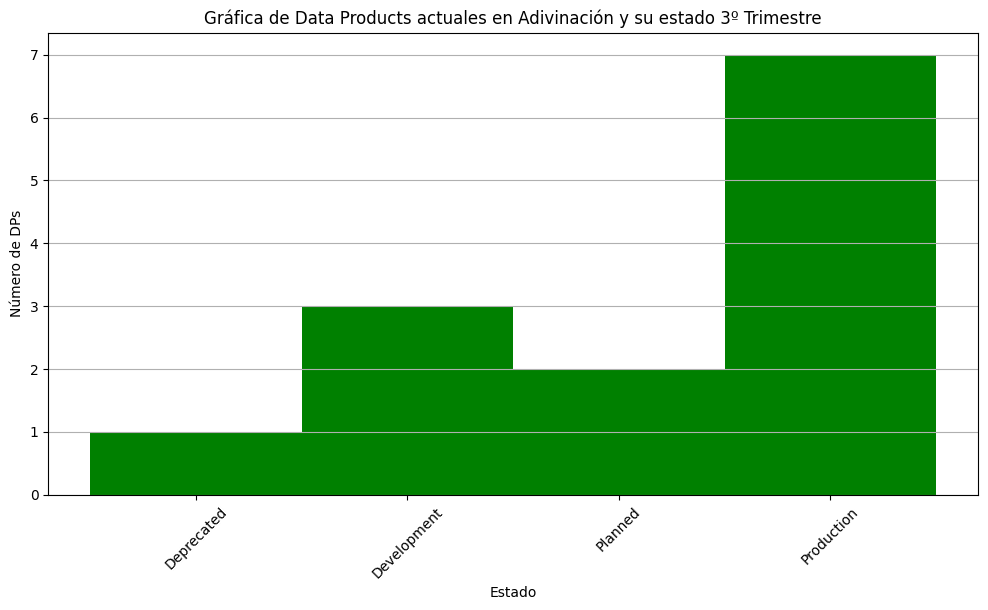

In [ ]:

plt.figure(figsize=(12, 6))
plt.bar(Grafica3Adiv['Status'], Grafica3Adiv['ID'], width=1
        , color='green')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Adivinación y su estado 3º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

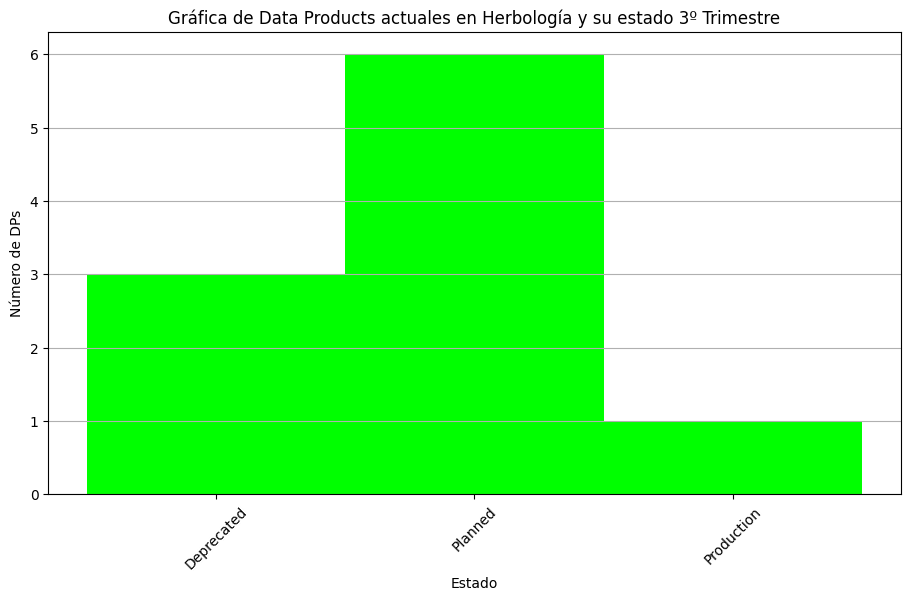

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica3Herb['Status'], Grafica3Herb['ID'], width=1
        , color='lime')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Herbología y su estado 3º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

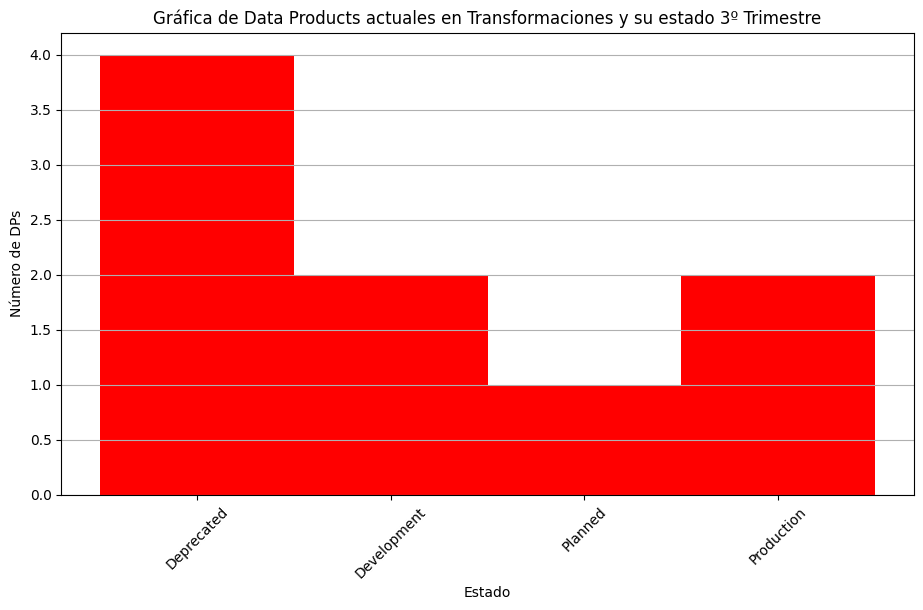

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica3Transf['Status'], Grafica3Transf['ID'], width=1
        , color='red')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Transformaciones y su estado 3º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

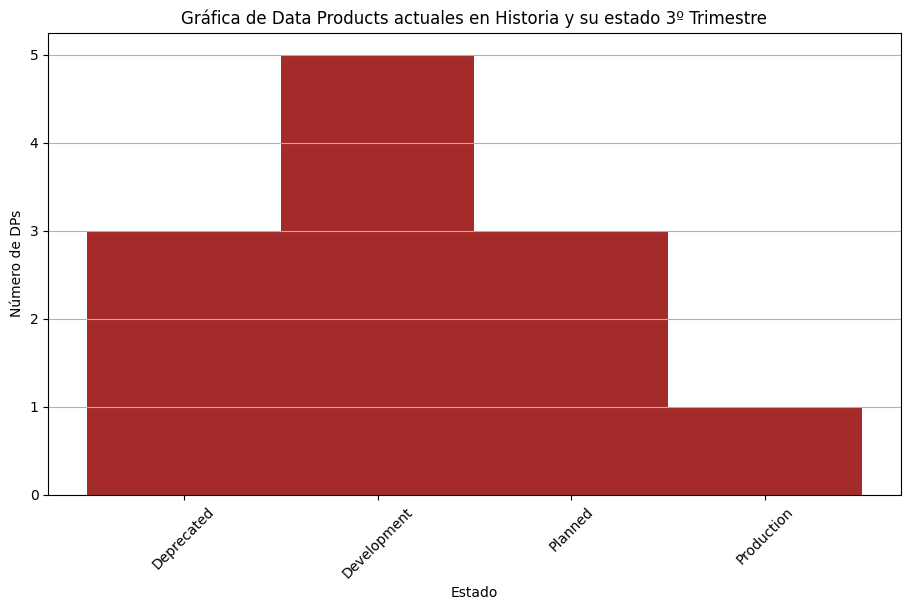

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica3Hist['Status'], Grafica3Hist['ID'], width=1
        , color='Brown')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Historia y su estado 3º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

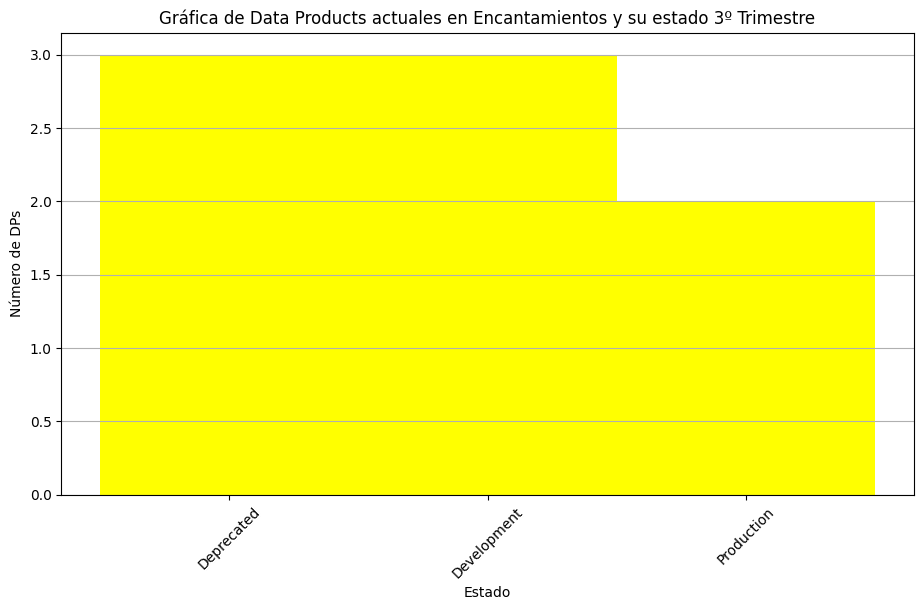

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica3Encan['Status'], Grafica3Encan['ID'], width=1
        , color='Yellow')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Encantamientos y su estado 3º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

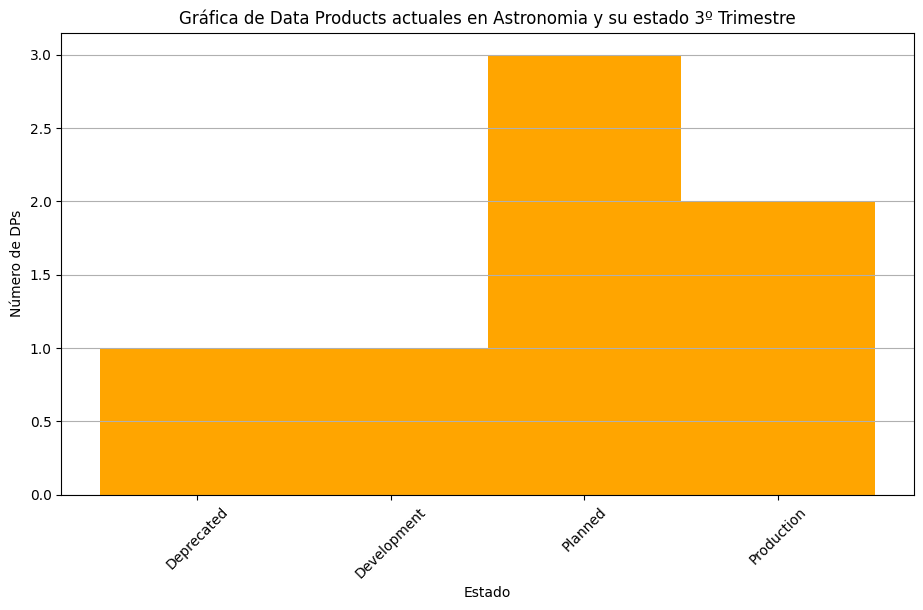

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica3Astronom['Status'], Grafica3Astronom['ID'], width=1
        , color='Orange')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Astronomia y su estado 3º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

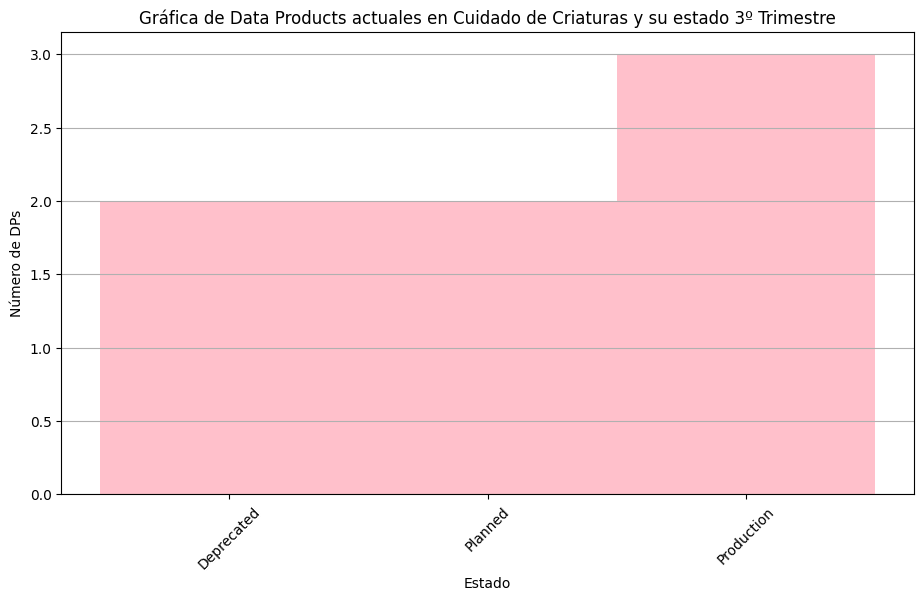

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica3Cuidado['Status'], Grafica3Cuidado['ID'], width=1
        , color='Pink')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Cuidado de Criaturas y su estado 3º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

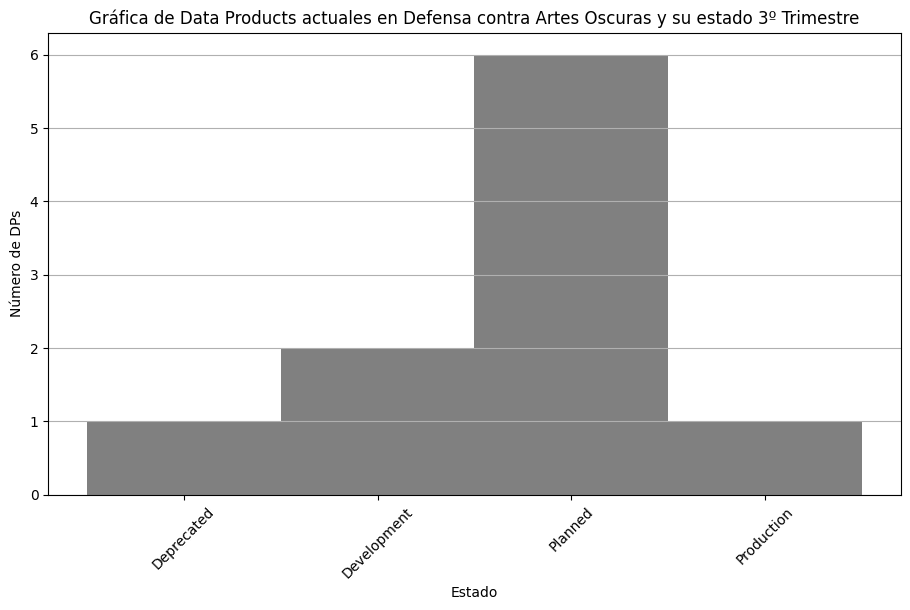

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(Grafica3Defensa['Status'], Grafica3Defensa['ID'], width=1
        , color='Grey')
plt.xlabel('Estado')
plt.ylabel('Número de DPs')
plt.title('Gráfica de Data Products actuales en Defensa contra Artes Oscuras y su estado 3º Trimestre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# REPRESENTACIONES

Evolución temporal del número de usuarios de Data Products en producción.

In [ ]:
#Extraigo el número de ususarios de DP's Pannned en cada triemstre
A=Hog1.query('Status == "Production"')[['NumberUsers']].sum()
B=Hog2.query('Status == "Production"')[['NumberUsers']].sum()
C=Hog3.query('Status == "Production"')[['NumberUsers']].sum()

In [ ]:
#Defino mi escala temporal por trimestres y Extraigo los números de usuarios
VectorTrimestres= ['Primer Trimestre', 'Segundo Trimestre', 'Tercer Trimestre']
DPProduction = [A.iloc[0], B.iloc[0], C.iloc[0]]

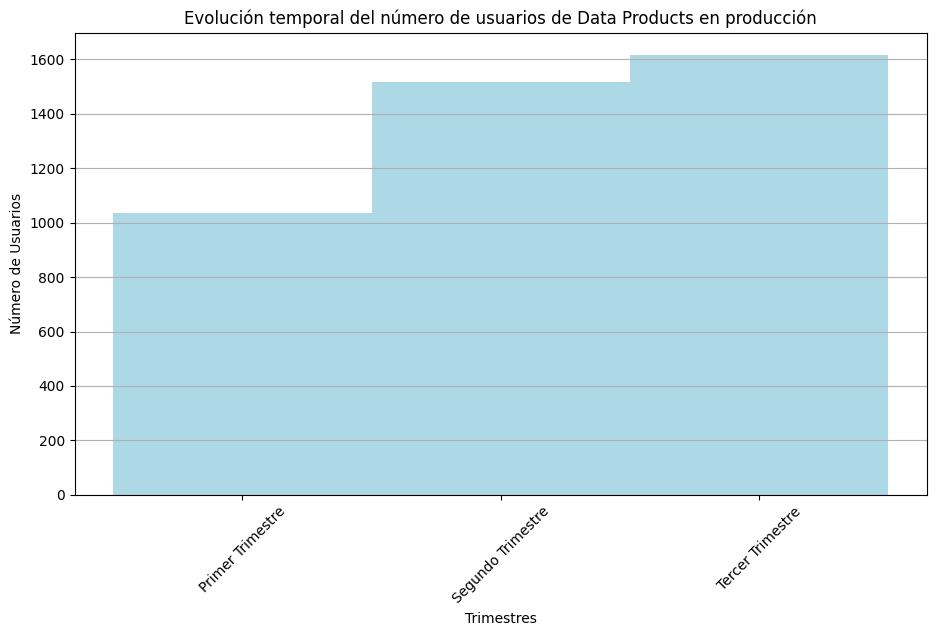

In [ ]:
plt.figure(figsize=(11, 6))
plt.bar(VectorTrimestres, DPProduction, width=1
        , color='lightblue')
plt.xlabel('Trimestres')
plt.ylabel('Número de Usuarios')
plt.title('Evolución temporal del número de usuarios de Data Products en producción')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Evolución temporal de Data Products totales frente a aquellos que cumplen con
compliance.

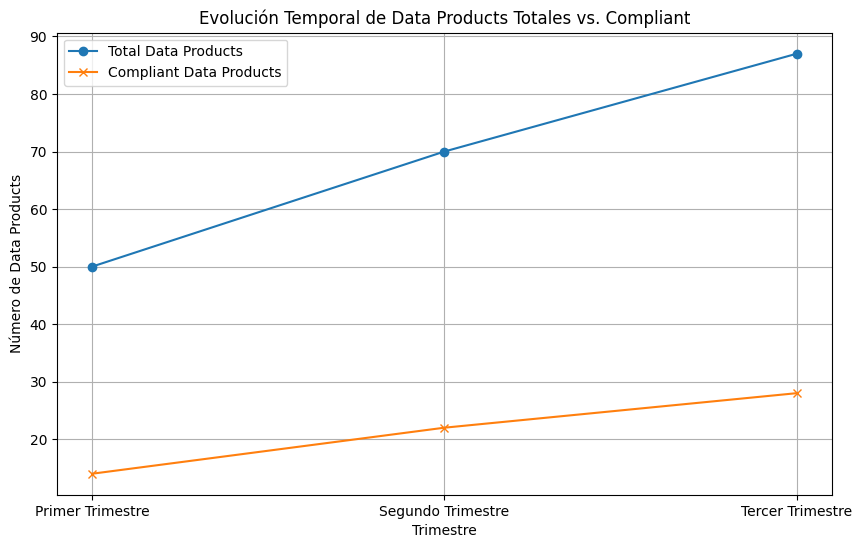

In [ ]:
#Representacion de la Evolución temporal de Data Products totales frente a aquellos que cumplen con compliance


# Datos
trimestres = ['Primer Trimestre', 'Segundo Trimestre', 'Tercer Trimestre']
total_dps = [len(Hog1), len(Hog2), len(Hog3)]  # Número total de DP's en cada trimestre
compliant_dps = [len(Hog1[Hog1['Analysis'] == 'Compliant']),
                 len(Hog2[Hog2['Analysis'] == 'Compliant']),
                 len(Hog3[Hog3['Analysis'] == 'Compliant'])] # Número total de compliant en cada Trimestre
#Represento mi gráfico
plt.figure(figsize=(10, 6))
plt.plot(trimestres, total_dps, marker='o', label='Total Data Products')
plt.plot(trimestres, compliant_dps, marker='x', label='Compliant Data Products')

plt.xlabel('Trimestre')
plt.ylabel('Número de Data Products')
plt.title('Evolución Temporal de Data Products Totales vs. Compliant')
plt.legend()
plt.grid(True)
plt.show()

Evolución temporal del número de Owners por dominio.

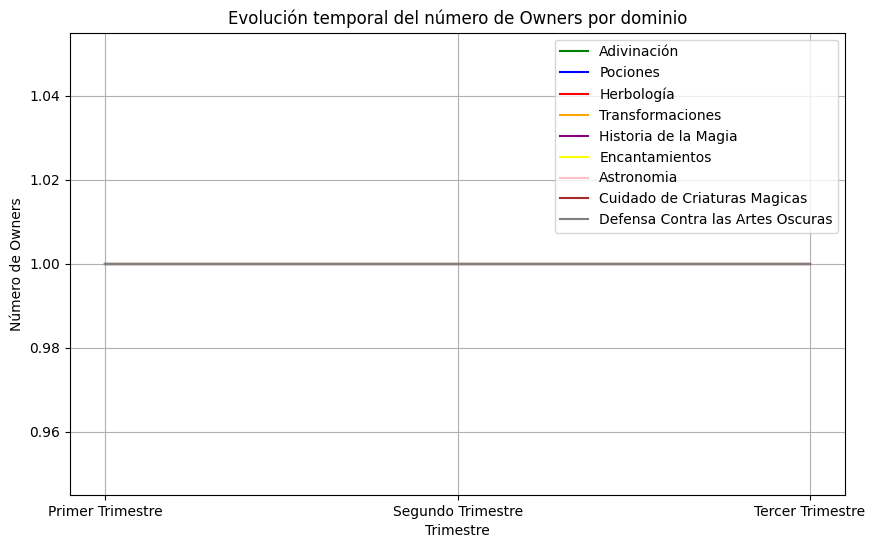

In [ ]:
trimestres = ['Primer Trimestre', 'Segundo Trimestre', 'Tercer Trimestre']
#Creo vectores por domino de longitud 3 con el número de Owners en cada trimestre)
OwnersAdiv = [len(Hog1.query('Domain == "Adivinacion"')[['Owner']].nunique()), len(Hog2.query('Domain == "Adivinacion"')[['Owner']].nunique()), len(Hog3.query('Domain == "Adivinacion"')[['Owner']].nunique())]
OwnersPoci = [len(Hog1.query('Domain == "Pociones"')[['Owner']].nunique()), len(Hog2.query('Domain == "Pociones"')[['Owner']].nunique()), len(Hog3.query('Domain == "Pociones"')[['Owner']].nunique())]
OwnersHerb = [len(Hog1.query('Domain == "Herbologia"')[['Owner']].nunique()), len(Hog2.query('Domain == "Herbologia"')[['Owner']].nunique()), len(Hog3.query('Domain == "Pociones"')[['Owner']].nunique())]
OwnersTransf = [len(Hog1.query('Domain == "Transformaciones"')[['Owner']].nunique()), len(Hog2.query('Domain == "Transformaciones"')[['Owner']].nunique()), len(Hog3.query('Domain == "Transformaciones"')[['Owner']].nunique())]
OwnersHist = [len(Hog1.query('Domain == "Historia de la Magia"')[['Owner']].nunique()), len(Hog2.query('Domain == "Historia de la Magia"')[['Owner']].nunique()), len(Hog3.query('Domain == "Historia de la Magia"')[['Owner']].nunique())]
OwnersEncant = [len(Hog1.query('Domain == "Encantamientos"')[['Owner']].nunique()), len(Hog2.query('Domain == "Encantamientos"')[['Owner']].nunique()), len(Hog3.query('Domain == "Encantamientos"')[['Owner']].nunique())]
OwnersAstronom=[len(Hog1.query('Domain == "Astronomia"')[['Owner']].nunique()), len(Hog2.query('Domain == "Astronomia"')[['Owner']].nunique()), len(Hog3.query('Domain == "Astronomia"')[['Owner']].nunique())]
OwnersCuidado=[len(Hog1.query('Domain == "Cuidado de Criaturas Magicas"')[['Owner']].nunique()), len(Hog2.query('Domain == "Cuidado de Criaturas Magicas"')[['Owner']].nunique()), len(Hog3.query('Domain == "Cuidado de Criaturas Magicas"')[['Owner']].nunique())]
OwnersDefensa=[len(Hog1.query('Domain == "Defensa Contra las Artes Oscuras"')[['Owner']].nunique()), len(Hog2.query('Domain == "Defensa Contra las Artes Oscuras"')[['Owner']].nunique()), len(Hog3.query('Domain == "Defensa Contra las Artes Oscuras"')[['Owner']].nunique())]


#Represento mi gráfico
plt.figure(figsize=(10, 6))
plt.plot(trimestres, OwnersAdiv, color='green', label='Adivinación')
plt.plot(trimestres, OwnersPoci, color='blue', label='Pociones')
plt.plot(trimestres, OwnersHerb, color='red', label='Herbología')
plt.plot(trimestres, OwnersTransf, color='orange', label='Transformaciones')
plt.plot(trimestres, OwnersHist, color='purple', label='Historia de la Magia')
plt.plot(trimestres, OwnersEncant, color='yellow', label='Encantamientos')
plt.plot(trimestres, OwnersAstronom, color='pink', label='Astronomia')
plt.plot(trimestres, OwnersCuidado, color='brown', label='Cuidado de Criaturas Magicas')
plt.plot(trimestres, OwnersDefensa, color='grey', label='Defensa Contra las Artes Oscuras')

plt.xlabel('Trimestre')
plt.ylabel('Número de Owners')
plt.title('Evolución temporal del número de Owners por dominio')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print('Al parecer solo hay un Owner por cada dominio y este número no aumenta con el tiempo, lo que si aumenta es el número de hechizos que propone cada uno por trimestre como hemos visto en las anteriores gráficas')

Al parecer solo hay un Owner por cada dominio y este número no aumenta con el tiempo, lo que si aumenta es el número de hechizos que propone cada uno por trimestre como hemos visto en las anteriores gráficas
